In [1]:
## Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import gc

In [2]:
# Definindo o caminho da pasta dos datasets
dataset_path = 'dataset/'

# Carregando os arquivos em DataFrames
application_train = pd.read_csv(f'{dataset_path}application_train.csv')
application_test = pd.read_csv(f'{dataset_path}application_test.csv')
bureau = pd.read_csv(f'{dataset_path}bureau.csv')
pos_cash_balance = pd.read_csv(f'{dataset_path}POS_CASH_balance.csv')
credit_card_balance = pd.read_csv(f'{dataset_path}credit_card_balance.csv')
previous_application = pd.read_csv(f'{dataset_path}previous_application.csv')
installments_payments = pd.read_csv(f'{dataset_path}installments_payments.csv')

In [3]:
# Exibindo informações básicas de cada DataFrame para confirmação de carregamento
print('application_train shape:', application_train.shape)
print('application_test shape:', application_test.shape)
print('bureau shape:', bureau.shape)
print('pos_cash_balance shape:', pos_cash_balance.shape)
print('credit_card_balance shape:', credit_card_balance.shape)
print('previous_application shape:', previous_application.shape)
print('installments_payments shape:', installments_payments.shape)

application_train shape: (307511, 122)
application_test shape: (48744, 121)
bureau shape: (1716428, 17)
pos_cash_balance shape: (10001358, 8)
credit_card_balance shape: (3840312, 23)
previous_application shape: (1670214, 37)
installments_payments shape: (13605401, 8)


In [4]:
# Função para exibir os tipos de dados de cada DataFrame de forma mais elegante
def display_data_types(df, df_name):
    print(f'\nTipos de dados do dataset {df_name}:\n')
    data_types = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo de Dado': df.dtypes,
        'Valores Não Nulos': df.notnull().sum(),
        'Porcentagem Não Nula (%)': (df.notnull().sum() / len(df) * 100).round(2)
    })
    display(data_types)

# Chamando a função para cada dataset
display_data_types(application_train, 'application_train')
display_data_types(application_test, 'application_test')
display_data_types(bureau, 'bureau')
display_data_types(pos_cash_balance, 'POS_CASH_balance')
display_data_types(credit_card_balance, 'credit_card_balance')
display_data_types(previous_application, 'previous_application')
display_data_types(installments_payments, 'installments_payments')



Tipos de dados do dataset application_train:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_CURR,SK_ID_CURR,int64,307511,100.0
TARGET,TARGET,int64,307511,100.0
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,object,307511,100.0
CODE_GENDER,CODE_GENDER,object,307511,100.0
FLAG_OWN_CAR,FLAG_OWN_CAR,object,307511,100.0
...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,float64,265992,86.5
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,float64,265992,86.5
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,float64,265992,86.5
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,float64,265992,86.5



Tipos de dados do dataset application_test:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_CURR,SK_ID_CURR,int64,48744,100.00
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,object,48744,100.00
CODE_GENDER,CODE_GENDER,object,48744,100.00
FLAG_OWN_CAR,FLAG_OWN_CAR,object,48744,100.00
FLAG_OWN_REALTY,FLAG_OWN_REALTY,object,48744,100.00
...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,float64,42695,87.59
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,float64,42695,87.59
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,float64,42695,87.59
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,float64,42695,87.59



Tipos de dados do dataset bureau:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_CURR,SK_ID_CURR,int64,1716428,100.00
SK_ID_BUREAU,SK_ID_BUREAU,int64,1716428,100.00
CREDIT_ACTIVE,CREDIT_ACTIVE,object,1716428,100.00
CREDIT_CURRENCY,CREDIT_CURRENCY,object,1716428,100.00
DAYS_CREDIT,DAYS_CREDIT,int64,1716428,100.00
CREDIT_DAY_OVERDUE,CREDIT_DAY_OVERDUE,int64,1716428,100.00
DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE,float64,1610875,93.85
DAYS_ENDDATE_FACT,DAYS_ENDDATE_FACT,float64,1082775,63.08
AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_MAX_OVERDUE,float64,591940,34.49
CNT_CREDIT_PROLONG,CNT_CREDIT_PROLONG,int64,1716428,100.00



Tipos de dados do dataset POS_CASH_balance:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_PREV,SK_ID_PREV,int64,10001358,100.00
SK_ID_CURR,SK_ID_CURR,int64,10001358,100.00
MONTHS_BALANCE,MONTHS_BALANCE,int64,10001358,100.00
CNT_INSTALMENT,CNT_INSTALMENT,float64,9975287,99.74
CNT_INSTALMENT_FUTURE,CNT_INSTALMENT_FUTURE,float64,9975271,99.74
NAME_CONTRACT_STATUS,NAME_CONTRACT_STATUS,object,10001358,100.00
SK_DPD,SK_DPD,int64,10001358,100.00
SK_DPD_DEF,SK_DPD_DEF,int64,10001358,100.00



Tipos de dados do dataset credit_card_balance:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_PREV,SK_ID_PREV,int64,3840312,100.00
SK_ID_CURR,SK_ID_CURR,int64,3840312,100.00
MONTHS_BALANCE,MONTHS_BALANCE,int64,3840312,100.00
AMT_BALANCE,AMT_BALANCE,float64,3840312,100.00
AMT_CREDIT_LIMIT_ACTUAL,AMT_CREDIT_LIMIT_ACTUAL,int64,3840312,100.00
AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_ATM_CURRENT,float64,3090496,80.48
AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_CURRENT,float64,3840312,100.00
AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,float64,3090496,80.48
AMT_DRAWINGS_POS_CURRENT,AMT_DRAWINGS_POS_CURRENT,float64,3090496,80.48
AMT_INST_MIN_REGULARITY,AMT_INST_MIN_REGULARITY,float64,3535076,92.05



Tipos de dados do dataset previous_application:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_PREV,SK_ID_PREV,int64,1670214,100.00
SK_ID_CURR,SK_ID_CURR,int64,1670214,100.00
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,object,1670214,100.00
AMT_ANNUITY,AMT_ANNUITY,float64,1297979,77.71
AMT_APPLICATION,AMT_APPLICATION,float64,1670214,100.00
AMT_CREDIT,AMT_CREDIT,float64,1670213,100.00
AMT_DOWN_PAYMENT,AMT_DOWN_PAYMENT,float64,774370,46.36
AMT_GOODS_PRICE,AMT_GOODS_PRICE,float64,1284699,76.92
WEEKDAY_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,object,1670214,100.00
HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,int64,1670214,100.00



Tipos de dados do dataset installments_payments:



,Coluna,Tipo de Dado,Valores Não Nulos,Porcentagem Não Nula (%)
SK_ID_PREV,SK_ID_PREV,int64,13605401,100.00
SK_ID_CURR,SK_ID_CURR,int64,13605401,100.00
NUM_INSTALMENT_VERSION,NUM_INSTALMENT_VERSION,float64,13605401,100.00
NUM_INSTALMENT_NUMBER,NUM_INSTALMENT_NUMBER,int64,13605401,100.00
DAYS_INSTALMENT,DAYS_INSTALMENT,float64,13605401,100.00
DAYS_ENTRY_PAYMENT,DAYS_ENTRY_PAYMENT,float64,13602496,99.98
AMT_INSTALMENT,AMT_INSTALMENT,float64,13605401,100.00
AMT_PAYMENT,AMT_PAYMENT,float64,13602496,99.98


In [5]:
# Função para exibir a porcentagem de valores não nulos de cada DataFrame
def display_non_null_percentage(df, df_name):
    print(f'\nPorcentagem de valores não nulos no dataset {df_name}:\n')
    non_null_percentage = (df.notnull().sum() / len(df) * 100).round(2)
    display(non_null_percentage)

# Chamando a função para cada dataset
display_non_null_percentage(application_train, 'application_train')
display_non_null_percentage(application_test, 'application_test')
display_non_null_percentage(bureau, 'bureau')
display_non_null_percentage(pos_cash_balance, 'POS_CASH_balance')
display_non_null_percentage(credit_card_balance, 'credit_card_balance')
display_non_null_percentage(previous_application, 'previous_application')
display_non_null_percentage(installments_payments, 'installments_payments')


Porcentagem de valores não nulos no dataset application_train:



SK_ID_CURR                    100.0
TARGET                        100.0
NAME_CONTRACT_TYPE            100.0
CODE_GENDER                   100.0
FLAG_OWN_CAR                  100.0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      86.5
AMT_REQ_CREDIT_BUREAU_WEEK     86.5
AMT_REQ_CREDIT_BUREAU_MON      86.5
AMT_REQ_CREDIT_BUREAU_QRT      86.5
AMT_REQ_CREDIT_BUREAU_YEAR     86.5
Length: 122, dtype: float64


Porcentagem de valores não nulos no dataset application_test:



SK_ID_CURR                    100.00
NAME_CONTRACT_TYPE            100.00
CODE_GENDER                   100.00
FLAG_OWN_CAR                  100.00
FLAG_OWN_REALTY               100.00
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      87.59
AMT_REQ_CREDIT_BUREAU_WEEK     87.59
AMT_REQ_CREDIT_BUREAU_MON      87.59
AMT_REQ_CREDIT_BUREAU_QRT      87.59
AMT_REQ_CREDIT_BUREAU_YEAR     87.59
Length: 121, dtype: float64


Porcentagem de valores não nulos no dataset bureau:



SK_ID_CURR                100.00
SK_ID_BUREAU              100.00
CREDIT_ACTIVE             100.00
CREDIT_CURRENCY           100.00
DAYS_CREDIT               100.00
CREDIT_DAY_OVERDUE        100.00
DAYS_CREDIT_ENDDATE        93.85
DAYS_ENDDATE_FACT          63.08
AMT_CREDIT_MAX_OVERDUE     34.49
CNT_CREDIT_PROLONG        100.00
AMT_CREDIT_SUM            100.00
AMT_CREDIT_SUM_DEBT        84.99
AMT_CREDIT_SUM_LIMIT       65.52
AMT_CREDIT_SUM_OVERDUE    100.00
CREDIT_TYPE               100.00
DAYS_CREDIT_UPDATE        100.00
AMT_ANNUITY                28.53
dtype: float64


Porcentagem de valores não nulos no dataset POS_CASH_balance:



SK_ID_PREV               100.00
SK_ID_CURR               100.00
MONTHS_BALANCE           100.00
CNT_INSTALMENT            99.74
CNT_INSTALMENT_FUTURE     99.74
NAME_CONTRACT_STATUS     100.00
SK_DPD                   100.00
SK_DPD_DEF               100.00
dtype: float64


Porcentagem de valores não nulos no dataset credit_card_balance:



SK_ID_PREV                    100.00
SK_ID_CURR                    100.00
MONTHS_BALANCE                100.00
AMT_BALANCE                   100.00
AMT_CREDIT_LIMIT_ACTUAL       100.00
AMT_DRAWINGS_ATM_CURRENT       80.48
AMT_DRAWINGS_CURRENT          100.00
AMT_DRAWINGS_OTHER_CURRENT     80.48
AMT_DRAWINGS_POS_CURRENT       80.48
AMT_INST_MIN_REGULARITY        92.05
AMT_PAYMENT_CURRENT            80.00
AMT_PAYMENT_TOTAL_CURRENT     100.00
AMT_RECEIVABLE_PRINCIPAL      100.00
AMT_RECIVABLE                 100.00
AMT_TOTAL_RECEIVABLE          100.00
CNT_DRAWINGS_ATM_CURRENT       80.48
CNT_DRAWINGS_CURRENT          100.00
CNT_DRAWINGS_OTHER_CURRENT     80.48
CNT_DRAWINGS_POS_CURRENT       80.48
CNT_INSTALMENT_MATURE_CUM      92.05
NAME_CONTRACT_STATUS          100.00
SK_DPD                        100.00
SK_DPD_DEF                    100.00
dtype: float64


Porcentagem de valores não nulos no dataset previous_application:



SK_ID_PREV                     100.00
SK_ID_CURR                     100.00
NAME_CONTRACT_TYPE             100.00
AMT_ANNUITY                     77.71
AMT_APPLICATION                100.00
AMT_CREDIT                     100.00
AMT_DOWN_PAYMENT                46.36
AMT_GOODS_PRICE                 76.92
WEEKDAY_APPR_PROCESS_START     100.00
HOUR_APPR_PROCESS_START        100.00
FLAG_LAST_APPL_PER_CONTRACT    100.00
NFLAG_LAST_APPL_IN_DAY         100.00
RATE_DOWN_PAYMENT               46.36
RATE_INTEREST_PRIMARY            0.36
RATE_INTEREST_PRIVILEGED         0.36
NAME_CASH_LOAN_PURPOSE         100.00
NAME_CONTRACT_STATUS           100.00
DAYS_DECISION                  100.00
NAME_PAYMENT_TYPE              100.00
CODE_REJECT_REASON             100.00
NAME_TYPE_SUITE                 50.88
NAME_CLIENT_TYPE               100.00
NAME_GOODS_CATEGORY            100.00
NAME_PORTFOLIO                 100.00
NAME_PRODUCT_TYPE              100.00
CHANNEL_TYPE                   100.00
SELLERPLACE_


Porcentagem de valores não nulos no dataset installments_payments:



SK_ID_PREV                100.00
SK_ID_CURR                100.00
NUM_INSTALMENT_VERSION    100.00
NUM_INSTALMENT_NUMBER     100.00
DAYS_INSTALMENT           100.00
DAYS_ENTRY_PAYMENT         99.98
AMT_INSTALMENT            100.00
AMT_PAYMENT                99.98
dtype: float64

In [6]:
# Organizamos os DataFrames em um dicionário para facilitar o acesso
data = {
    'application_train': application_train,
    'application_test': application_test,
    'bureau': bureau,
    'POS_CASH_balance': pos_cash_balance,
    'credit_card_balance': credit_card_balance,
    'previous_application': previous_application,
    'installments_payments': installments_payments
}

# Função para imprimir os tipos de dados únicos
def print_dtypes(df, dataset_name):
    print(f"\nUnique data types in {dataset_name}:")
    print(df.dtypes.value_counts())

# Encontrar os tipos de dados presentes em todos os datasets
for key in data.keys():
    print_dtypes(data[key], key)



Unique data types in application_train:
float64    65
int64      41
object     16
Name: count, dtype: int64

Unique data types in application_test:
float64    65
int64      40
object     16
Name: count, dtype: int64

Unique data types in bureau:
float64    8
int64      6
object     3
Name: count, dtype: int64

Unique data types in POS_CASH_balance:
int64      5
float64    2
object     1
Name: count, dtype: int64

Unique data types in credit_card_balance:
float64    15
int64       7
object      1
Name: count, dtype: int64

Unique data types in previous_application:
object     16
float64    15
int64       6
Name: count, dtype: int64

Unique data types in installments_payments:
float64    5
int64      3
Name: count, dtype: int64


In [7]:
# Seleciona todas as colunas do DataFrame 'application_train' que possuem tipo de dado 'object' (ou seja, colunas categóricas).
# Em seguida, aplica a função 'nunique' de pandas em cada coluna, contando o número de valores únicos presentes em cada uma.
# O resultado é uma série que mostra quantos valores únicos existem em cada coluna categórica do DataFrame.


data['application_train'].select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [8]:
# Seleciona todas as colunas do DataFrame 'application_train' que possuem tipo de dado 'object' (ou seja, colunas categóricas).
# Em seguida, aplica a função 'nunique' de pandas em cada coluna, contando o número de valores únicos presentes em cada uma.
# O resultado é uma série que mostra quantos valores únicos existem em cada coluna categórica do DataFrame.


# Verifica os tipos de gênero únicos
data['application_train']['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [9]:
# Filtra os registros dos DataFrames 'application_train' e 'application_test', mantendo apenas as linhas em que o valor da coluna 'CODE_GENDER' não é igual a 'XNA'.
# Isso remove registros indesejados com o valor 'XNA' para a coluna de gênero, garantindo que apenas os gêneros válidos sejam considerados na análise.


# Seleciona os registros onde CODE_GENDER não é igual a 'XNA'
data['application_train'] = data['application_train'][data['application_train']['CODE_GENDER'] != 'XNA']
data['application_test'] = data['application_test'][data['application_test']['CODE_GENDER'] != 'XNA']

In [10]:
# Verifica os tipos únicos de 'ORGANIZATION_TYPE' no DataFrame 'application_train'.
# Isso retorna uma lista com todos os diferentes valores que aparecem na coluna 'ORGANIZATION_TYPE',
# permitindo entender as diversas categorias de organizações representadas nos dados.

# Verifica os tipos únicos de 'ORGANIZATION_TYPE'
data['application_train']['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [11]:
# Extrai as colunas 'TARGET' e 'ORGANIZATION_TYPE' do DataFrame 'application_train' para analisar a relação entre elas.
# Converte a coluna categórica 'ORGANIZATION_TYPE' em variáveis dummy, criando uma coluna binária para cada tipo de organização,
# exceto a primeira categoria (drop_first=True), o que evita multicolinearidade.
# Calcula a matriz de correlação entre todas as variáveis numéricas, incluindo as dummies e o TARGET.
# Ordena as correlações com relação ao 'TARGET' em ordem crescente, para identificar quais tipos de organização
# têm correlação positiva ou negativa com a variável de interesse 'TARGET'.
# Por fim, exibe as correlações dos tipos de organização com o TARGET, permitindo entender quais categorias têm
# maior ou menor influência na probabilidade de inadimplência (representada pelo TARGET).


# Verifica a correlação do tipo de organização com o TARGET
# Extrai as colunas relevantes
ext_data = data['application_train'][['TARGET', 'ORGANIZATION_TYPE']]
ext_data_encoded = pd.get_dummies(ext_data, columns=['ORGANIZATION_TYPE'], drop_first=True)

# Calcula as correlações
ext_data_corrs = ext_data_encoded.corr()

# Exibe a correlação das novas variáveis com o TARGET
target_corr = ext_data_corrs['TARGET'].sort_values()

# Mostra as correlações com o TARGET
print("Correlações com TARGET:")
print(target_corr)

Correlações com TARGET:
ORGANIZATION_TYPE_XNA                      -0.045989
ORGANIZATION_TYPE_School                   -0.013672
ORGANIZATION_TYPE_Medicine                 -0.010615
ORGANIZATION_TYPE_Military                 -0.010058
ORGANIZATION_TYPE_Police                   -0.009887
ORGANIZATION_TYPE_Bank                     -0.009610
ORGANIZATION_TYPE_Security Ministries      -0.009471
ORGANIZATION_TYPE_University               -0.007672
ORGANIZATION_TYPE_Government               -0.007521
ORGANIZATION_TYPE_Trade: type 6            -0.005788
ORGANIZATION_TYPE_Kindergarten             -0.005759
ORGANIZATION_TYPE_Industry: type 12        -0.005444
ORGANIZATION_TYPE_Industry: type 9         -0.005379
ORGANIZATION_TYPE_Services                 -0.003871
ORGANIZATION_TYPE_Insurance                -0.003850
ORGANIZATION_TYPE_Other                    -0.003785
ORGANIZATION_TYPE_Hotel                    -0.003410
ORGANIZATION_TYPE_Transport: type 1        -0.003375
ORGANIZATION_TYPE_Cult

In [12]:
# Exibe estatísticas descritivas da coluna 'DAYS_EMPLOYED' no DataFrame 'application_train'.
# As estatísticas incluem: contagem, média, desvio padrão, valores mínimo e máximo, e percentis (25%, 50%, 75%).
# Isso ajuda a entender a distribuição dos valores na coluna 'DAYS_EMPLOYED', que representa o número de dias
# que um cliente esteve empregado até a data de aplicação do empréstimo.
display(data['application_train']['DAYS_EMPLOYED'].describe())

# Exibe estatísticas descritivas da coluna 'DAYS_EMPLOYED' no DataFrame 'application_test'.
# As mesmas informações estatísticas são exibidas, permitindo comparar a distribuição da variável 'DAYS_EMPLOYED'
# entre os conjuntos de treino e teste, identificando possíveis discrepâncias ou anomalias.
display(data['application_test']['DAYS_EMPLOYED'].describe())


count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [13]:
# Substitui o valor 365243 por NaN (valor ausente) na coluna 'DAYS_EMPLOYED' dos DataFrames 'application_train' e 'application_test'.
# Esse valor específico (365243) é um valor anômalo e impossível (representando mais de 1000 anos de emprego),
# provavelmente utilizado como um indicador para casos especiais (como desemprego).
# Ao substituí-lo por NaN, o código facilita o tratamento dos valores ausentes e melhora a qualidade dos dados para análise posterior.
# O argumento 'inplace=True' garante que a substituição seja feita diretamente nos DataFrames, sem a necessidade de criar uma nova cópia.


# Substitui o valor 365243 por NaN usando loc para evitar o alerta de cópia
data['application_train'].loc[data['application_train']['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan
data['application_test'].loc[data['application_test']['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan

In [14]:
# Define uma função chamada 'check_missing_values' para verificar a quantidade de valores ausentes em um DataFrame.
# A função recebe um DataFrame 'df' e o nome do dataset 'dataset_name' como argumentos.
# Calcula o número de valores ausentes (NaN) em cada coluna usando 'isnull().sum()'.
# Filtra apenas as colunas que possuem valores ausentes e as ordena de forma decrescente, para destacar as colunas mais problemáticas.
# Se houver colunas com valores ausentes, a função imprime o nome do dataset seguido das colunas com suas respectivas contagens de valores ausentes.
# Caso contrário, imprime que não há valores ausentes no dataset.
# Em seguida, a função é aplicada a todos os DataFrames contidos no dicionário 'data', permitindo analisar a presença de valores ausentes em cada um.


# Função para verificar valores ausentes
def check_missing_values(df, dataset_name):
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)  # Mostra apenas as colunas com valores ausentes
    if not missing_columns.empty:
        print(f"\nValores ausentes em {dataset_name}:\n{missing_columns}")
    else:
        print(f"\nNão há valores ausentes em {dataset_name}.")
        
# Verifica os valores ausentes em todos os datasets
for key in data.keys():
    check_missing_values(data[key], key)


Valores ausentes em application_train:
COMMONAREA_MODE             214862
COMMONAREA_AVG              214862
COMMONAREA_MEDI             214862
NONLIVINGAPARTMENTS_MEDI    213512
NONLIVINGAPARTMENTS_MODE    213512
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 68, dtype: int64

Valores ausentes em application_test:
COMMONAREA_MEDI             33495
COMMONAREA_MODE             33495
COMMONAREA_AVG              33495
NONLIVINGAPARTMENTS_MODE    33347
NONLIVINGAPARTMENTS_AVG     33347
                            ...  
OBS_60_CNT_SOCIAL_CIRCLE       29
DEF_30_CNT_SOCIAL_CIRCLE       29
OBS_30_CNT_SOCIAL_CIRCLE       29
AMT_ANNUITY                    24
EXT_SOURCE_2                    8
Length: 65, dtype: int64

Valores ausentes em bureau:
AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FA

In [15]:
# Define uma função chamada 'check_missing_percentage' que calcula a porcentagem de valores ausentes para cada coluna de um DataFrame.
# A função calcula a porcentagem multiplicando a quantidade de valores ausentes em cada coluna por 100, e dividindo pelo número total de linhas do DataFrame.
# Em seguida, filtra apenas as colunas que têm valores ausentes (percentual maior que 0) e ordena em ordem decrescente.
# Retorna as colunas que possuem valores ausentes, com suas respectivas porcentagens.

# Itera sobre todos os DataFrames armazenados no dicionário 'data', que contém os datasets.
# Para cada dataset, imprime uma mensagem indicando qual dataset está sendo analisado.
# Chama a função 'check_missing_percentage' para calcular e exibir as porcentagens de valores ausentes para cada coluna que tiver dados ausentes.
# A saída mostra a porcentagem de valores ausentes em cada coluna do DataFrame, permitindo identificar rapidamente quais colunas têm mais valores faltantes e necessitam de tratamento.


# Função para verificar a porcentagem de valores ausentes
def check_missing_percentage(df):
    missing_percentage = 100 * df.isnull().sum() / len(df)
    missing_columns = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
    return missing_columns

# Verifica a porcentagem de valores ausentes para cada dataset
for key in data.keys():
    print(f"\nPorcentagem de valores ausentes em {key}:")
    missing_percentage = check_missing_percentage(data[key])
    print(missing_percentage)


Porcentagem de valores ausentes em application_train:
COMMONAREA_MODE             69.872231
COMMONAREA_AVG              69.872231
COMMONAREA_MEDI             69.872231
NONLIVINGAPARTMENTS_MEDI    69.433216
NONLIVINGAPARTMENTS_MODE    69.433216
                              ...    
EXT_SOURCE_2                 0.214629
AMT_GOODS_PRICE              0.090404
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 68, dtype: float64

Porcentagem de valores ausentes em application_test:
COMMONAREA_MEDI             68.716150
COMMONAREA_MODE             68.716150
COMMONAREA_AVG              68.716150
NONLIVINGAPARTMENTS_MODE    68.412523
NONLIVINGAPARTMENTS_AVG     68.412523
                              ...    
OBS_60_CNT_SOCIAL_CIRCLE     0.059495
DEF_30_CNT_SOCIAL_CIRCLE     0.059495
OBS_30_CNT_SOCIAL_CIRCLE     0.059495
AMT_ANNUITY                  0.049237
EXT_SOURCE_2                 0.016412
Length: 65, dtype: float64



In [16]:
# Define uma função chamada 'handle_missing_values' que trata os valores ausentes em um DataFrame.
# A função remove colunas que possuem mais de 75% de valores ausentes, utilizando um limite (threshold) de 0.75.
# Identifica as colunas que devem ser removidas (aquelas com mais de 75% de valores ausentes) e as armazena em 'cols_to_drop'.
# Remove essas colunas do DataFrame usando 'drop', com 'inplace=True' para modificar o DataFrame original.
# Exibe uma mensagem informando quais colunas foram removidas, para facilitar o acompanhamento do processo.
# Retorna o DataFrame atualizado, agora sem as colunas com muitos valores ausentes.

# Itera sobre todos os datasets armazenados no dicionário 'data', aplicando a função 'handle_missing_values' a cada um.
# Para cada dataset, imprime uma mensagem informando que o tratamento de valores ausentes está sendo realizado.
# Depois de aplicar o tratamento, exibe uma mensagem com o nome do dataset processado e suas novas dimensões (número de linhas e colunas).


# Função para lidar com valores ausentes
def handle_missing_values(df):
    # Remove colunas com mais de 75% de valores ausentes
    threshold = 0.75
    cols_to_drop = df.columns[df.isnull().mean() > threshold]
    # Cria uma nova versão do DataFrame sem as colunas especificadas
    df = df.drop(columns=cols_to_drop)
    print(f"Colunas removidas com mais de {threshold*100}% de valores ausentes: {list(cols_to_drop)}")
    return df

# Aplica o tratamento de valores ausentes a todos os datasets
for key in data.keys():
    print(f"\nTratando valores ausentes para o dataset {key}...")
    data[key] = handle_missing_values(data[key])
    print(f"Dataset {key} processado. Dimensão final: {data[key].shape}")


Tratando valores ausentes para o dataset application_train...
Colunas removidas com mais de 75.0% de valores ausentes: []
Dataset application_train processado. Dimensão final: (307507, 122)

Tratando valores ausentes para o dataset application_test...
Colunas removidas com mais de 75.0% de valores ausentes: []
Dataset application_test processado. Dimensão final: (48744, 121)

Tratando valores ausentes para o dataset bureau...
Colunas removidas com mais de 75.0% de valores ausentes: []
Dataset bureau processado. Dimensão final: (1716428, 17)

Tratando valores ausentes para o dataset POS_CASH_balance...
Colunas removidas com mais de 75.0% de valores ausentes: []
Dataset POS_CASH_balance processado. Dimensão final: (10001358, 8)

Tratando valores ausentes para o dataset credit_card_balance...
Colunas removidas com mais de 75.0% de valores ausentes: []
Dataset credit_card_balance processado. Dimensão final: (3840312, 23)

Tratando valores ausentes para o dataset previous_application...
Co

In [17]:
# Define uma função chamada 'encode_categorical_features' para codificar colunas categóricas de um DataFrame.
# A função recebe um DataFrame 'df' e o nome do dataset 'dataset_name' como argumentos.
# Armazena as dimensões (número de linhas e colunas) antes de aplicar a codificação, para comparações posteriores.
# Identifica as colunas categóricas (tipo object) e armazena seus nomes em 'cat_cols'.
# Cria um objeto 'LabelEncoder' para codificar colunas com duas categorias.

# Imprime as dimensões iniciais do DataFrame e lista as colunas categóricas identificadas.
# Itera por cada coluna categórica:
#   - Se a coluna tiver apenas dois valores únicos, aplica Label Encoding, que transforma as categorias em 0 e 1.
#   - Se a coluna tiver mais de dois valores únicos, aplica One-Hot Encoding, criando colunas binárias para cada categoria,
#     exceto a primeira (drop_first=True) para evitar multicolinearidade.

# Converte colunas de tipo booleano para inteiros (0 e 1), garantindo que estejam em formato numérico.
# Armazena as dimensões do DataFrame após a codificação e as imprime.
# Retorna o DataFrame atualizado, já com as colunas categóricas codificadas.

# Itera sobre todos os datasets armazenados no dicionário 'data', aplicando a função de codificação a cada um.
# Para cada dataset, imprime uma mensagem indicando que está sendo processado e exibe as dimensões finais após a codificação.


# Função para codificar colunas categóricas e imprimir as dimensões
def encode_categorical_features(df, dataset_name):

    # Obtém as dimensões antes da codificação
    initial_shape = df.shape
    
    # Seleciona as colunas categóricas (tipo object)
    cat_cols = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()

    print(f"\nDimensão inicial: {initial_shape}")
    print(f"Encontradas {len(cat_cols)} colunas categóricas para codificar: {list(cat_cols)}")
    
    for col in cat_cols:
        # Se a coluna tem apenas dois valores únicos, aplica Label Encoding
        if df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])
            print(f"Label Encoding aplicado à coluna: {col}")
        else:
            # Aplica One-Hot Encoding para colunas com múltiplas categorias
            df = pd.get_dummies(df, columns=[col], drop_first=True)
            print(f"One-Hot Encoding aplicado à coluna: {col}")
    
    # Converte qualquer coluna booleana em inteiros (0 e 1)
    for col in df.select_dtypes(include=[bool]).columns:
        df[col] = df[col].astype(int)
        
    # Obtém as dimensões após a codificação
    final_shape = df.shape
    print(f"Dimensão final após a codificação: {final_shape}")
    
    return df

# Aplica a codificação a todos os datasets
for key in data.keys():
    print(f"\nProcessando o dataset {key}...")
    data[key] = encode_categorical_features(data[key], key)
    print(f"Dataset {key} processado. Dimensão final: {data[key].shape}")



Processando o dataset application_train...

Dimensão inicial: (307507, 122)
Encontradas 16 colunas categóricas para codificar: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Label Encoding aplicado à coluna: NAME_CONTRACT_TYPE
Label Encoding aplicado à coluna: CODE_GENDER
Label Encoding aplicado à coluna: FLAG_OWN_CAR
Label Encoding aplicado à coluna: FLAG_OWN_REALTY
One-Hot Encoding aplicado à coluna: NAME_TYPE_SUITE
One-Hot Encoding aplicado à coluna: NAME_INCOME_TYPE
One-Hot Encoding aplicado à coluna: NAME_EDUCATION_TYPE
One-Hot Encoding aplicado à coluna: NAME_FAMILY_STATUS
One-Hot Encoding aplicado à coluna: NAME_HOUSING_TYPE
One-Hot Encoding aplicado à coluna: OCCUPATION_TYPE
One-Hot Encoding apli

In [18]:
# Exibe as primeiras 5 linhas do DataFrame 'application_train' usando o método 'head()'.
# Isso permite visualizar uma amostra dos dados de treino para entender melhor a estrutura e os valores das colunas.
# O comentário sugere que, ao visualizar essa amostra, percebe-se que não existem variáveis categóricas (tipo 'object') presentes nos primeiros registros.


# Vamos dar uma olhada em uma amostra dos dados de treino. Podemos ver que não há variáveis categóricas aqui.
data['application_train'].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Calcula a matriz de correlação para o DataFrame 'application_train' e extrai a correlação de cada variável com a coluna 'TARGET'.
# Ordena os valores de correlação em ordem crescente usando 'sort_values()', facilitando a identificação de variáveis que têm relação
# mais forte (positiva ou negativa) com a variável alvo.

# Imprime as 5 maiores correlações positivas, ou seja, as variáveis que têm uma relação direta mais forte com o 'TARGET'.
# Essas variáveis tendem a aumentar conforme o 'TARGET' aumenta.

# Imprime as 5 maiores correlações negativas, ou seja, as variáveis que têm uma relação inversa mais forte com o 'TARGET'.
# Essas variáveis tendem a diminuir conforme o 'TARGET' aumenta.

# As correlações positivas podem indicar variáveis que aumentam o risco de inadimplência (se o TARGET representar isso),
# enquanto as negativas podem indicar características que diminuem esse risco.


# Encontra as correlações com a variável alvo ('TARGET') e ordena
correlations = data['application_train'].corr()['TARGET'].sort_values()

# Exibe as correlações
print('Maiores Correlações Positivas:\n', correlations.tail(5))
print('\nMaiores Correlações Negativas:\n', correlations.head(5))

Maiores Correlações Positivas:
 REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_EMPLOYED                  0.074957
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64

Maiores Correlações Negativas:
 EXT_SOURCE_3                           -0.178926
EXT_SOURCE_2                           -0.160471
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046211
Name: TARGET, dtype: float64


/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


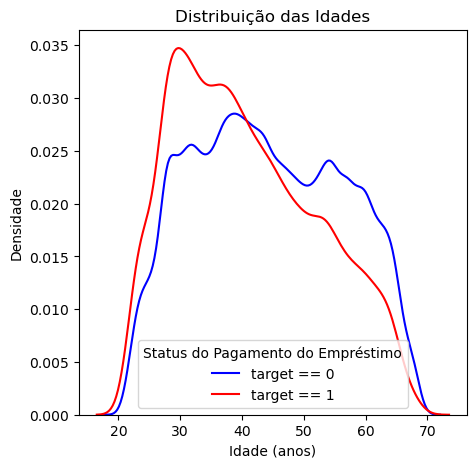

In [20]:
# Substitui valores infinitos por NaN nos dados antes de gerar os gráficos
data['application_train'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Cria a figura para o gráfico com tamanho definido
plt.figure(figsize=(5, 5))

# Garante que os valores de 'DAYS_BIRTH' sejam positivos, pois representam a idade em dias negativos
data['application_train']['DAYS_BIRTH'] = abs(data['application_train']['DAYS_BIRTH'])

# Calcula a correlação entre 'DAYS_BIRTH' e 'TARGET' para entender a relação entre idade e inadimplência
data['application_train']['DAYS_BIRTH'].corr(data['application_train']['TARGET'])

# Gráfico KDE (Kernel Density Estimate) da idade dos clientes que pagaram os empréstimos em dia (TARGET == 0)
sns.kdeplot(data['application_train'].loc[data['application_train']['TARGET'] == 0, 'DAYS_BIRTH'] / 365, 
            label='target == 0', color='blue')

# Gráfico KDE da idade dos clientes que não pagaram os empréstimos em dia (TARGET == 1)
sns.kdeplot(data['application_train'].loc[data['application_train']['TARGET'] == 1, 'DAYS_BIRTH'] / 365, 
            label='target == 1', color='red')

# Adiciona o rótulo no eixo X para representar a idade em anos
plt.xlabel('Idade (anos)')

# Adiciona o rótulo no eixo Y para representar a densidade
plt.ylabel('Densidade')

# Adiciona um título ao gráfico para descrever o que está sendo exibido
plt.title('Distribuição das Idades')

# Adiciona uma legenda para diferenciar as duas curvas (clientes que pagaram ou não em dia)
plt.legend(title="Status do Pagamento do Empréstimo")

# Exibe o gráfico
plt.show()

In [21]:
# O gráfico mostra a Distribuição das Idades dos clientes em relação ao status de pagamento dos empréstimos.
# Os dados utilizados para esse gráfico foram retirados do dataset 'application_train' do Home Credit Default Risk.

# Linhas Azuis (target == 0):
# Representam a densidade de clientes que pagaram os empréstimos em dia.
# Ou seja, mostram as idades dos clientes que não tiveram problemas de inadimplência.

# Linhas Vermelhas (target == 1):
# Representam a densidade de clientes que não pagaram os empréstimos em dia.
# Ou seja, indicam os clientes que ficaram inadimplentes.

# Variável 'DAYS_BIRTH' foi usada para calcular a idade dos clientes.
# Os valores são originalmente negativos (representando os dias de vida até a aplicação do empréstimo),
# então aplicamos a função 'abs()' para obter valores positivos e depois convertemos para anos dividindo por 365.

# Variável 'TARGET' é a variável-alvo que indica o status de pagamento:
# TARGET == 0: Cliente pagou o empréstimo em dia.
# TARGET == 1: Cliente não pagou o empréstimo em dia (inadimplente).

# Análise do Gráfico:
# - Idades Mais Jovens (20-30 anos): A densidade de inadimplência (vermelho) é maior em relação aos que pagaram em dia (azul).
#   Isso sugere que a faixa etária mais jovem tem maior tendência à inadimplência.
# - Idades Entre 30-40 Anos: As curvas se aproximam, indicando que a diferença entre clientes adimplentes e inadimplentes é menor.
# - Idades Mais Velhas (> 50 anos): A densidade de clientes que pagam em dia (azul) é maior do que a de inadimplentes (vermelho),
#   sugerindo que clientes mais velhos têm menor tendência à inadimplência.

# Conclusão:
# Este gráfico indica que a idade do cliente é uma variável importante para a análise de risco de crédito.
# Clientes mais jovens (20-30 anos) apresentam um maior risco de inadimplência,
# enquanto clientes mais velhos tendem a ser mais confiáveis em relação ao pagamento de seus empréstimos.
# Essas informações podem ser úteis para ajustar critérios de aprovação de crédito e para construir modelos preditivos
# que considerem a idade como um fator relevante na avaliação do risco de crédito.


/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


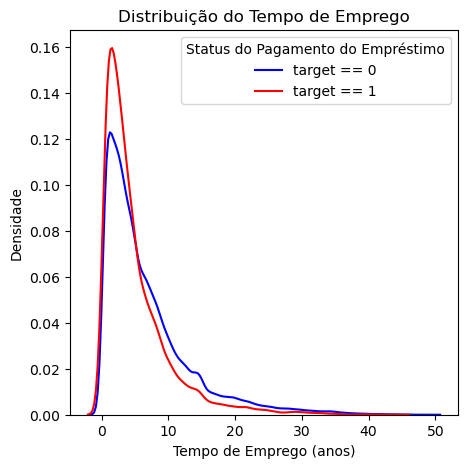

In [22]:
# Cria a figura para o gráfico com tamanho definido
plt.figure(figsize=(5, 5))

# Garante que os valores de 'DAYS_EMPLOYED' sejam positivos, pois representam o número de dias de emprego (podem ser negativos no dataset)
data['application_train']['DAYS_EMPLOYED'] = abs(data['application_train']['DAYS_EMPLOYED'])

# Calcula a correlação entre 'DAYS_EMPLOYED' e 'TARGET' para entender a relação entre tempo de emprego e inadimplência
data['application_train']['DAYS_EMPLOYED'].corr(data['application_train']['TARGET'])

# Gráfico KDE (Kernel Density Estimate) do tempo de emprego dos clientes que pagaram os empréstimos em dia (TARGET == 0)
sns.kdeplot(data['application_train'].loc[data['application_train']['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, 
            label='target == 0', color='blue')

# Gráfico KDE do tempo de emprego dos clientes que não pagaram os empréstimos em dia (TARGET == 1)
sns.kdeplot(data['application_train'].loc[data['application_train']['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, 
            label='target == 1', color='red')

# Adiciona o rótulo no eixo X para representar o tempo de emprego em anos
plt.xlabel('Tempo de Emprego (anos)')

# Adiciona o rótulo no eixo Y para representar a densidade
plt.ylabel('Densidade')

# Adiciona um título ao gráfico para descrever o que está sendo exibido
plt.title('Distribuição do Tempo de Emprego')

# Adiciona uma legenda para diferenciar as duas curvas (clientes que pagaram ou não em dia)
plt.legend(title="Status do Pagamento do Empréstimo")

# Exibe o gráfico
plt.show()

In [23]:
# O gráfico mostra a Distribuição do Tempo de Emprego dos clientes em relação ao status de pagamento dos empréstimos.
# Os dados utilizados para esse gráfico foram retirados do dataset 'application_train' do Home Credit Default Risk.

# Linhas Azuis (target == 0):
# Representam a densidade dos clientes que pagaram os empréstimos em dia.
# Ou seja, mostram a distribuição do tempo de emprego (em anos) dos clientes que não tiveram problemas de inadimplência.

# Linhas Vermelhas (target == 1):
# Representam a densidade dos clientes que não pagaram os empréstimos em dia (inadimplentes).
# Ou seja, mostram a distribuição do tempo de emprego (em anos) desses clientes.

# Variável 'DAYS_EMPLOYED' foi usada para representar o tempo de emprego dos clientes em dias.
# Os valores negativos foram convertidos para positivos e transformados em anos dividindo por 365, para melhor interpretação.

# Variável 'TARGET' é a variável-alvo que indica o status de pagamento dos clientes:
# TARGET == 0: Cliente pagou o empréstimo em dia (não inadimplente).
# TARGET == 1: Cliente não pagou o empréstimo em dia (inadimplente).

# Análise do Gráfico:
# - A maioria dos clientes tem um tempo de emprego menor, concentrado principalmente entre 0 e 10 anos de emprego.
#   Isso é visível em ambas as curvas, com um pico próximo a zero anos.
# - Clientes com Menos de 1 Ano de Emprego: Há uma leve tendência de maior densidade de clientes inadimplentes (vermelho)
#   em comparação aos que pagaram em dia (azul), sugerindo uma probabilidade ligeiramente maior de inadimplência.
# - A partir de aproximadamente 2 anos de emprego, as curvas se tornam bastante similares, indicando que, conforme o tempo de emprego aumenta,
#   a diferença entre os clientes que pagam em dia e os inadimplentes tende a diminuir.
# - Em períodos de emprego superiores a 10 anos, a densidade é muito baixa em ambas as curvas, indicando que há poucos clientes
#   com um longo histórico de emprego.

# Conclusão:
# Este gráfico sugere que o tempo de emprego pode ter um impacto na probabilidade de inadimplência, especialmente para clientes
# com menos de 1 ano de emprego. No entanto, conforme o tempo de emprego aumenta, essa diferença diminui.
# Esses insights podem ser utilizados em modelos de análise de risco de crédito, considerando o tempo de emprego como um fator
# para prever a probabilidade de inadimplência.

In [24]:
# Extrai as variáveis 'EXT_SOURCE_1', 'EXT_SOURCE_2' e 'EXT_SOURCE_3' junto com 'TARGET', 'DAYS_BIRTH' e 'DAYS_EMPLOYED'
# do DataFrame 'application_train'. Essas variáveis 'EXT_SOURCE' representam pontuações externas de risco de crédito fornecidas
# por fontes externas ao Home Credit, sendo úteis para avaliar a relação com a variável alvo 'TARGET'.
ext_data = data['application_train'][['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]

# Calcula a matriz de correlação entre as variáveis selecionadas.
# A matriz de correlação mostra a relação linear entre cada par de variáveis, variando de -1 (correlação negativa perfeita)
# a +1 (correlação positiva perfeita), com 0 indicando nenhuma correlação linear.
ext_data_corrs = ext_data.corr()

# Exibe a matriz de correlação. Isso ajuda a identificar quais variáveis têm maior impacto na 'TARGET' e entre si,
# como as variáveis externas de pontuação (EXT_SOURCE) se relacionam com a probabilidade de inadimplência (TARGET).
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.155317,-0.160471,-0.178926,-0.078242,-0.074957
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186845,0.600621,0.252711
EXT_SOURCE_2,-0.160471,0.213982,1.000000,0.109182,0.092009,0.093463
EXT_SOURCE_3,-0.178926,0.186845,0.109182,1.000000,0.205465,0.129725
DAYS_BIRTH,-0.078242,0.600621,0.092009,0.205465,1.000000,0.352311
DAYS_EMPLOYED,-0.074957,0.252711,0.093463,0.129725,0.352311,1.000000


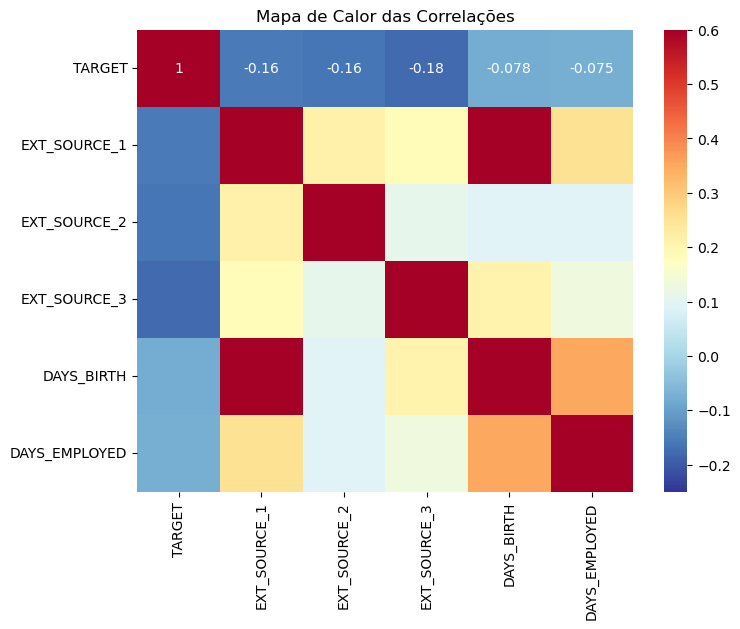

In [25]:
# Cria a figura para o gráfico de tamanho 8x6, que será usada para exibir o heatmap.
plt.figure(figsize=(8, 6))

# Gera um heatmap (mapa de calor) das correlações usando a matriz de correlação 'ext_data_corrs'.
# O heatmap visualiza a relação linear entre as variáveis selecionadas.
# Utiliza a colormap 'RdYlBu_r' (vermelho-amarelo-azul invertido), onde:
# - Valores negativos (correlações negativas) são representados por tons de azul.
# - Valores positivos (correlações positivas) são representados por tons de vermelho.
# - O parâmetro 'vmin' define o valor mínimo da barra de cores como -0.25, para garantir que os tons de azul sejam usados para correlações negativas.
# - O parâmetro 'vmax' define o valor máximo da barra de cores como 0.6, limitando os tons de vermelho às correlações positivas mais fortes.
# - 'annot=True' exibe os valores das correlações diretamente nas células do heatmap, facilitando a leitura dos números.

sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)

# Adiciona um título ao heatmap para indicar que o gráfico representa a matriz de correlação.
plt.title('Mapa de Calor das Correlações');

# O heatmap ajuda a visualizar rapidamente quais variáveis têm maior ou menor correlação com a variável 'TARGET'
# e entre si. Isso é útil para identificar possíveis relações que podem ser exploradas em análises de risco de crédito.

/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

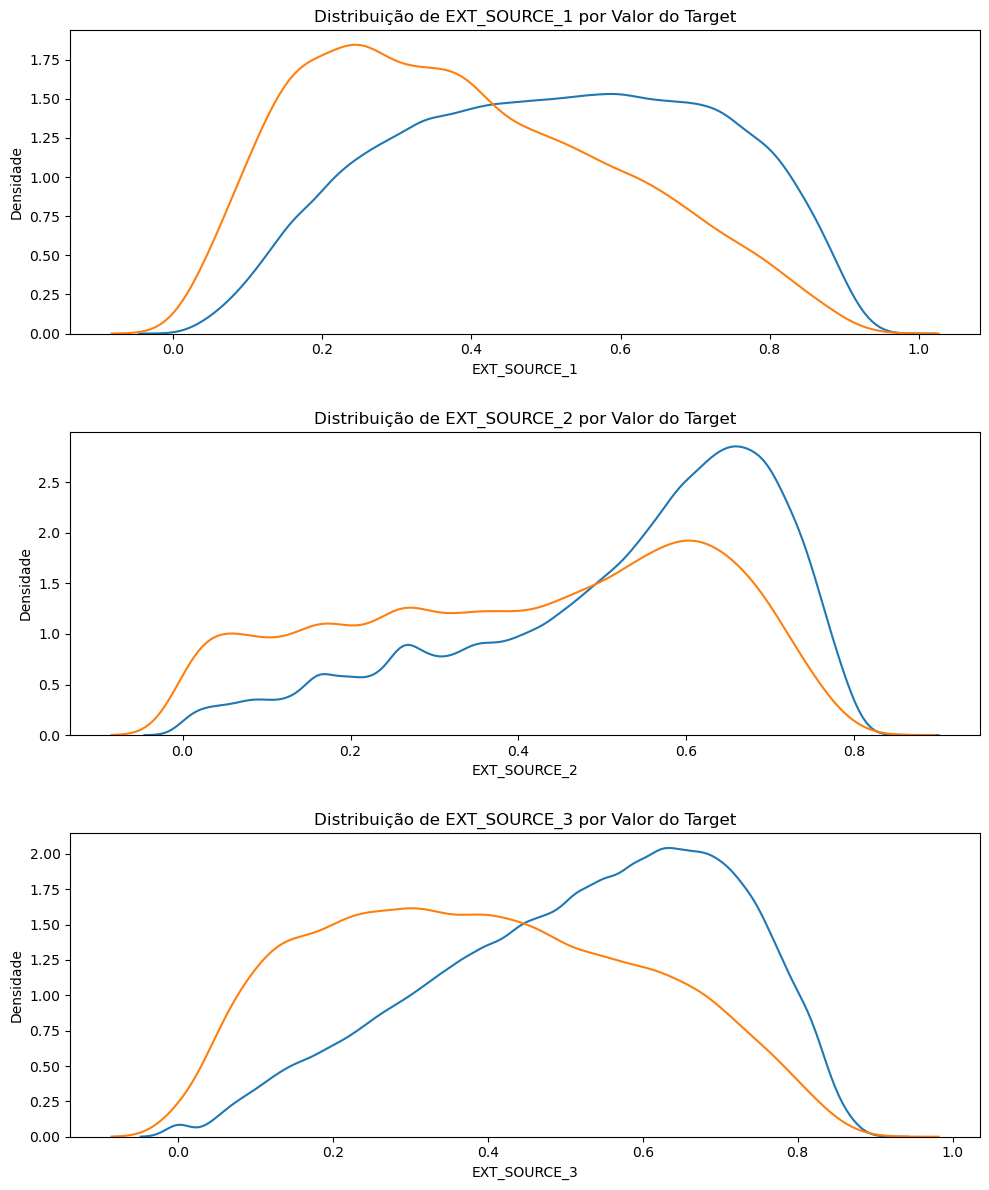

In [26]:
# Cria a figura principal para os gráficos com tamanho 10x12
plt.figure(figsize=(10, 12))

# Itera pelas variáveis 'EXT_SOURCE_1', 'EXT_SOURCE_2' e 'EXT_SOURCE_3'
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Cria um novo subplot para cada fonte de pontuação externa
    # Existem 3 linhas e 1 coluna de gráficos, e 'i + 1' define a posição de cada subplot.
    plt.subplot(3, 1, i + 1)
    
    # Plota a densidade dos empréstimos pagos em dia (TARGET == 0) para a fonte atual
    sns.kdeplot(data['application_train'].loc[data['application_train']['TARGET'] == 0, source], label='target == 0')
    
    # Plota a densidade dos empréstimos não pagos em dia (TARGET == 1) para a mesma fonte
    sns.kdeplot(data['application_train'].loc[data['application_train']['TARGET'] == 1, source], label='target == 1')
    
    # Adiciona o título ao gráfico com o nome da variável 'source'
    plt.title('Distribuição de %s por Valor do Target' % source)
    
    # Define o rótulo do eixo X como o nome da fonte de pontuação externa
    plt.xlabel('%s' % source)
    
    # Define o rótulo do eixo Y como 'Densidade'
    plt.ylabel('Densidade')

# Ajusta o layout dos subplots para evitar sobreposição e garantir espaçamento vertical (h_pad = 2.5)
plt.tight_layout(h_pad=2.5)

In [27]:
# Exibe as primeiras 5 linhas do DataFrame 'previous_application' usando o método 'head()'.
# Isso permite visualizar uma amostra dos dados de solicitações de empréstimos anteriores dos clientes.
# Cada linha representa uma solicitação anterior de crédito feita por um cliente, com informações detalhadas
# sobre os parâmetros do empréstimo anterior e o status de pagamento.
data['previous_application'].head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,1,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,1,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,1,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Verifica as colunas de 'previous_application' para identificar valores razoáveis nas variáveis de tempo.
# Essas variáveis estão relacionadas aos dias em que diferentes eventos do empréstimo ocorreram ou estão programados para ocorrer.

# 'DAYS_FIRST_DRAWING' representa os dias até a primeira vez que o crédito foi sacado.
# Exibe estatísticas descritivas como média, desvio padrão, valores mínimos e máximos para verificar a distribuição dos dados.
print(data['previous_application']['DAYS_FIRST_DRAWING'].describe())

# 'DAYS_FIRST_DUE' representa os dias até a primeira data de vencimento do crédito.
# As estatísticas descritivas ajudam a entender se há anomalias ou valores extremos.
print(data['previous_application']['DAYS_FIRST_DUE'].describe())

# 'DAYS_LAST_DUE_1ST_VERSION' representa os dias até a última data de vencimento na primeira versão do contrato.
# As estatísticas mostram a distribuição dos prazos finais e permitem identificar possíveis outliers.
print(data['previous_application']['DAYS_LAST_DUE_1ST_VERSION'].describe())

# 'DAYS_LAST_DUE' representa os dias até a última data de vencimento do crédito.
# A análise dos valores ajuda a entender a duração dos empréstimos anteriores e sua variabilidade.
print(data['previous_application']['DAYS_LAST_DUE'].describe())

# 'DAYS_TERMINATION' representa os dias até a data de término do contrato de crédito.
# Exibe estatísticas descritivas para avaliar os prazos de encerramento dos contratos e identificar qualquer valor fora do esperado.
print(data['previous_application']['DAYS_TERMINATION'].describe())

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64
count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64
count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64
count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64
count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       

In [29]:
# Substitui o valor 365243 por NaN (valor ausente) nas variáveis relacionadas a datas em 'previous_application'.
# O valor 365243 é considerado um valor anômalo e irreal, provavelmente utilizado como um marcador para ausência de dados.
# A substituição por NaN facilita o tratamento de dados ausentes durante as etapas de análise e modelagem.

# Substitui 365243 por NaN na coluna 'DAYS_FIRST_DRAWING', que representa os dias até o primeiro saque do crédito.
data['previous_application']['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)

# Substitui 365243 por NaN na coluna 'DAYS_FIRST_DUE', que representa os dias até a primeira data de vencimento do crédito.
data['previous_application']['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)

# Substitui 365243 por NaN na coluna 'DAYS_LAST_DUE_1ST_VERSION', que representa os dias até a última data de vencimento na primeira versão do contrato.
data['previous_application']['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)

# Substitui 365243 por NaN na coluna 'DAYS_LAST_DUE', que representa os dias até a última data de vencimento do crédito.
data['previous_application']['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)

# Substitui 365243 por NaN na coluna 'DAYS_TERMINATION', que representa os dias até o término do contrato de crédito.
data['previous_application']['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

In [30]:
# Função para tratar valores ausentes em um DataFrame
def impute_cols_with_nas(df):
    # Imputa valores ausentes para colunas numéricas usando a mediana.
    # Seleciona colunas do tipo float64 e int64.
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        # Preenche os valores ausentes na coluna numérica com a mediana da própria coluna.
        df[col].fillna(df[col].median(), inplace=True)
        
    # Imputa valores ausentes para colunas categóricas usando a moda.
    # Seleciona colunas do tipo object (categóricas).
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        # Preenche os valores ausentes na coluna categórica com a moda (valor mais frequente).
        df[col].fillna(df[col].mode()[0], inplace=True)

# Aplica a imputação de valores ausentes em cada um dos DataFrames armazenados no dicionário 'data'.
for key in data.keys():
    impute_cols_with_nas(data[key])

In [31]:
# Armazena os valores da variável-alvo 'TARGET' do DataFrame 'application_train' em uma variável separada.
# Isso é necessário porque ao alinhar os DataFrames de treino e teste, a coluna 'TARGET' será temporariamente removida.
train_labels = data['application_train']['TARGET']

# Alinha os DataFrames 'application_train' e 'application_test', mantendo apenas as colunas que estão presentes em ambos.
# Isso é importante para garantir que os dois DataFrames tenham as mesmas features (variáveis) para o modelo preditivo.
# O parâmetro 'join = "inner"' faz com que apenas as colunas que existem em ambos os DataFrames sejam mantidas.
# O alinhamento é feito ao longo das colunas ('axis = 1').
data['application_train'], data['application_test'] = data['application_train'].align(data['application_test'], join='inner', axis=1)

# Adiciona a variável-alvo 'TARGET' de volta ao DataFrame 'application_train'.
# Isso é necessário porque o alinhamento anterior removeu a coluna 'TARGET', já que ela só está presente no conjunto de treino.
data['application_train']['TARGET'] = train_labels

# Imprime a nova forma (shape) dos DataFrames de treino e teste para verificar se eles estão corretamente alinhados.
# 'shape' mostra o número de linhas e colunas dos DataFrames.
print('Forma das Features de Treino: ', data['application_train'].shape)
print('Forma das Features de Teste: ', data['application_test'].shape)

Forma das Features de Treino:  (307507, 227)
Forma das Features de Teste:  (48744, 226)


In [32]:
# Verifica a porcentagem de valores ausentes para cada dataset armazenado no dicionário 'data'.
# Para cada conjunto de dados (treino e teste), a função 'check_missing_percentage' calcula a porcentagem
# de valores ausentes (NaN) em cada coluna e exibe somente aquelas com valores ausentes.

# Itera sobre as chaves do dicionário 'data' (que representam os diferentes datasets).
for key in data.keys():
    # Imprime uma mensagem indicando qual dataset está sendo analisado.
    print(f"\nPorcentagem de valores ausentes em {key}:")
    
    # Chama a função 'check_missing_percentage' para calcular a porcentagem de valores ausentes em cada coluna do dataset.
    # A função retorna apenas as colunas que possuem valores ausentes e suas respectivas porcentagens.
    missing_percentage = check_missing_percentage(data[key])
    
    # Exibe a porcentagem de valores ausentes nas colunas do dataset atual.
    # As colunas com valores ausentes são listadas, facilitando a identificação de quais variáveis precisam de tratamento adicional.
    print(missing_percentage)


Porcentagem de valores ausentes em application_train:
Series([], dtype: float64)

Porcentagem de valores ausentes em application_test:
Series([], dtype: float64)

Porcentagem de valores ausentes em bureau:
Series([], dtype: float64)

Porcentagem de valores ausentes em POS_CASH_balance:
Series([], dtype: float64)

Porcentagem de valores ausentes em credit_card_balance:
Series([], dtype: float64)

Porcentagem de valores ausentes em previous_application:
Series([], dtype: float64)

Porcentagem de valores ausentes em installments_payments:
Series([], dtype: float64)


In [33]:
# Exibe as formas finais (número de linhas e colunas) dos DataFrames 'application_train' e 'application_test'.
# Isso é importante para verificar se os conjuntos de dados estão com as dimensões esperadas após todas as etapas de pré-processamento,
# como alinhamento, tratamento de valores ausentes e codificação de variáveis.

# Imprime a forma (número de linhas e colunas) do DataFrame 'application_train'.
print(data['application_train'].shape)

# Imprime a forma (número de linhas e colunas) do DataFrame 'application_test'.
print(data['application_test'].shape)

(307507, 227)
(48744, 226)


In [34]:
# Separa a variável-alvo 'TARGET' do DataFrame 'application_train' e a armazena em 'y_train'.
# 'TARGET' contém os rótulos para a classificação, indicando se um cliente ficou inadimplente (1) ou não (0).
y_train = data['application_train']['TARGET']

# Cria o conjunto de features (variáveis preditoras) 'X_train' removendo a coluna 'TARGET' e a coluna de identificação 'SK_ID_CURR'.
# 'SK_ID_CURR' é um identificador único para cada cliente, que não deve ser usado como uma feature no modelo de machine learning.
X_train = data['application_train'].drop(columns=['TARGET', 'SK_ID_CURR'])

# Divide os dados de treinamento em duas partes: 'X_train_split' e 'X_valid' para as features,
# e 'y_train_split' e 'y_valid' para os rótulos (TARGET).
# 'train_test_split' faz a divisão dos dados, utilizando 80% dos dados para o treinamento ('X_train_split' e 'y_train_split')
# e 20% dos dados para a validação ('X_valid' e 'y_valid').
# 'test_size=0.2' indica que 20% dos dados serão usados para validação.
# 'random_state=42' garante que a divisão seja reproduzível, pois fixa a semente do gerador de números aleatórios.
# 'stratify=y_train' garante que a proporção das classes (0 e 1) no conjunto de treinamento e validação seja mantida,
# o que é importante quando há um desbalanceamento entre as classes.
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [35]:
# Define um dicionário 'models' que contém os modelos de classificação que serão treinados e avaliados.
# Cada chave é o nome do modelo e cada valor é uma instância do modelo de machine learning.
models = {
    # Modelo de Regressão Logística, com 'max_iter=1000' para garantir a convergência durante o treinamento.
    "Logistic Regression": LogisticRegression(max_iter=1000),
    
    # Modelo de Random Forest, um ensemble de 100 árvores de decisão.
    # 'random_state=42' garante a reprodutibilidade dos resultados.
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Modelo XGBoost, uma técnica avançada de boosting, configurada para não usar o label encoder (use_label_encoder=False)
    # e para otimizar a métrica de perda 'logloss'. 'random_state=42' garante a reprodutibilidade.
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Treina e avalia cada um dos modelos definidos.
for model_name, model in models.items():
    # Ajusta (treina) o modelo usando os dados de treinamento 'X_train_split' e 'y_train_split'.
    model.fit(X_train_split, y_train_split)
    
    # Realiza previsões sobre o conjunto de validação 'X_valid' e calcula as probabilidades de cada classe.
    # '.predict_proba' retorna a probabilidade de cada classe (0 e 1). O índice [:, 1] seleciona as probabilidades da classe 1 (inadimplência).
    y_pred_valid = model.predict_proba(X_valid)[:, 1]
    
    # Calcula a métrica ROC AUC usando as probabilidades previstas e os rótulos verdadeiros 'y_valid'.
    # A ROC AUC é uma métrica que avalia a capacidade do modelo em distinguir entre as classes, variando de 0 a 1.
    # Um valor mais próximo de 1 indica melhor desempenho do modelo.
    roc_auc = roc_auc_score(y_valid, y_pred_valid)
    
    # Exibe o nome do modelo e o valor da métrica ROC AUC arredondado para quatro casas decimais.
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")

Logistic Regression ROC AUC: 0.6317
Random Forest ROC AUC: 0.7130


/home/srm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:23:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost ROC AUC: 0.7510


In [36]:
# Define uma função para criar um modelo de Rede Neural Densa (DNN) usando Keras.
# 'input_shape' define a quantidade de features (entradas) que o modelo deve esperar.
def create_dnn_model(input_shape):
    # Cria o modelo sequencial da rede neural.
    model = tf.keras.models.Sequential([
        # Primeira camada oculta com 64 neurônios e função de ativação ReLU.
        tf.keras.layers.Dense(64, input_dim=input_shape, activation='relu'),
        # Dropout de 0.3 para regularização, reduzindo overfitting ao desativar 30% dos neurônios durante o treinamento.
        tf.keras.layers.Dropout(0.3),
        # Segunda camada oculta com 32 neurônios e função de ativação ReLU.
        tf.keras.layers.Dense(32, activation='relu'),
        # Dropout de 0.3 novamente para regularização.
        tf.keras.layers.Dropout(0.3),
        # Terceira camada oculta com 16 neurônios e função de ativação ReLU.
        tf.keras.layers.Dense(16, activation='relu'),
        # Camada de saída com 1 neurônio e ativação 'sigmoid' para classificação binária (probabilidade de inadimplência).
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Compila o modelo utilizando o otimizador 'adam' e a função de perda 'binary_crossentropy'.
    # A métrica 'AUC' é usada para monitorar o desempenho do modelo durante o treinamento.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Define a forma das entradas, que é igual ao número de colunas em 'X_train_split' (número de features).
input_shape = X_train_split.shape[1]

# Inicializa o modelo DNN chamando a função 'create_dnn_model' com a forma das entradas.
dnn_model = create_dnn_model(input_shape)

# Define o callback de 'Early Stopping' para interromper o treinamento se a AUC de validação não melhorar após 3 épocas consecutivas.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',  # Monitora a métrica AUC de validação.
    patience=3,         # Número de épocas sem melhoria antes de interromper o treinamento.
    mode='max',         # Queremos maximizar a AUC.
    restore_best_weights=True  # Restaura os pesos do modelo a partir da época com a melhor AUC.
)

# Treina o modelo DNN utilizando os dados de treinamento e validação, aplicando 'early stopping'.
dnn_model.fit(
    X_train_split, y_train_split, 
    epochs=10,                  # Número máximo de épocas para treinamento.
    batch_size=264,             # Tamanho do lote (quantidade de exemplos processados antes de atualizar os pesos do modelo).
    validation_data=(X_valid, y_valid), 
    callbacks=[early_stopping],  # Adiciona o callback de 'early stopping' para parar o treinamento antecipadamente.
    verbose=1                   # Define a verbosidade para mostrar o progresso do treinamento.
)

# Avalia o modelo DNN nos dados de validação.
# Usa 'predict' para gerar as previsões do modelo e 'ravel()' para achatar o array em um vetor 1D para calcular a AUC.
y_pred_valid_dnn = dnn_model.predict(X_valid).ravel()

# Calcula a métrica ROC AUC com as previsões e os rótulos reais de validação.
roc_auc_dnn = roc_auc_score(y_valid, y_pred_valid_dnn)

# Imprime a AUC do modelo DNN, arredondada para quatro casas decimais.
print(f"Deep Neural Network ROC AUC: {roc_auc_dnn:.4f}")

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729265041.023454   17738 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 12:24:01.024673: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Sk

Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.5015 - loss: 1046.7440 - val_AUC: 0.4996 - val_loss: 0.3097
Epoch 2/10
 66/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.5066 - loss: 3.6395

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.5010 - loss: 6.1106 - val_AUC: 0.5000 - val_loss: 0.2806
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.4971 - loss: 1.8551 - val_AUC: 0.5000 - val_loss: 0.2846
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4976 - loss: 3.7033 - val_AUC: 0.5000 - val_loss: 0.3270
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.4990 - loss: 0.5689 - val_AUC: 0.5000 - val_loss: 0.2805
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4960 - loss: 0.4517 - val_AUC: 0.5000 - val_loss: 0.2806
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4972 - loss: 0.4862 - val_AUC: 0.5000 - val_loss: 0.2806
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4991 - loss: 0.3218 - val_AUC: 0.5000 - val_loss: 0.2806
Epoch 9/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5013 - loss: 0.3710 - val_AUC: 0.5000 - val_loss: 0.2805
Epoch 10/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4970 

In [37]:
# Inicializa o objeto 'StandardScaler' para padronizar os dados.
# A padronização transforma as features para que tenham média 0 e desvio padrão 1.
# Isso é importante para modelos que são sensíveis à escala dos dados, como redes neurais e métodos de regularização.
scaler = StandardScaler()

# Ajusta o 'scaler' nos dados de treinamento usando 'fit_transform' e transforma os dados de treinamento.
# O 'fit_transform' calcula a média e o desvio padrão de cada feature em 'X_train_split' e, em seguida, aplica a transformação.
# O resultado é um conjunto de treinamento 'X_train_scaled' onde cada feature está padronizada.
X_train_scaled = scaler.fit_transform(X_train_split)

# Transforma os dados de validação usando os mesmos parâmetros (média e desvio padrão) calculados a partir dos dados de treinamento.
# Isso garante que a padronização dos dados de validação esteja de acordo com os mesmos padrões dos dados de treinamento.
# O 'transform' aplica a transformação, mas sem recalcular os parâmetros.
X_valid_scaled = scaler.transform(X_valid)

In [38]:
# Treina e avalia cada um dos modelos definidos utilizando os dados padronizados.
# A padronização dos dados (X_train_scaled e X_valid_scaled) garante que todas as variáveis estejam na mesma escala,
# o que pode melhorar o desempenho de certos modelos de machine learning.

for model_name, model in models.items():
    # Ajusta (treina) o modelo usando os dados de treinamento padronizados 'X_train_scaled' e 'y_train_split'.
    model.fit(X_train_scaled, y_train_split)
    
    # Realiza previsões sobre o conjunto de validação padronizado 'X_valid_scaled'.
    # Usa 'predict_proba' para obter as probabilidades de cada classe (0 e 1).
    # O índice [:, 1] seleciona as probabilidades da classe 1 (inadimplência).
    y_pred_valid = model.predict_proba(X_valid_scaled)[:, 1]
    
    # Calcula a métrica ROC AUC usando as probabilidades previstas e os rótulos verdadeiros 'y_valid'.
    # A ROC AUC mede a habilidade do modelo em distinguir entre as classes, variando de 0 a 1.
    # Um valor mais próximo de 1 indica que o modelo é melhor em classificar as duas classes corretamente.
    roc_auc = roc_auc_score(y_valid, y_pred_valid)
    
    # Exibe o nome do modelo e o valor da métrica ROC AUC, arredondado para quatro casas decimais.
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")

Logistic Regression ROC AUC: 0.7491
Random Forest ROC AUC: 0.7131


/home/srm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost ROC AUC: 0.7510


In [39]:
# Define uma função para criar um modelo otimizado de Rede Neural Densa (DNN) usando Keras.
# 'input_shape' define a quantidade de features (entradas) que o modelo deve esperar.
def create_optimized_dnn_model(input_shape):
    # Cria o modelo sequencial da rede neural.
    model = tf.keras.models.Sequential([
        # Primeira camada oculta com 128 neurônios e função de ativação ReLU.
        tf.keras.layers.Dense(128, input_dim=input_shape, activation='relu'),
        # Dropout de 0.4 para regularização, desativando 40% dos neurônios durante o treinamento para reduzir overfitting.
        tf.keras.layers.Dropout(0.4),
        # Normalização em lote (Batch Normalization) para estabilizar o aprendizado e acelerar a convergência.
        tf.keras.layers.BatchNormalization(),
        
        # Segunda camada oculta com 64 neurônios e função de ativação ReLU.
        tf.keras.layers.Dense(64, activation='relu'),
        # Dropout de 0.4 para regularização.
        tf.keras.layers.Dropout(0.4),
        # Normalização em lote para estabilizar o aprendizado após a segunda camada.
        tf.keras.layers.BatchNormalization(),
        
        # Terceira camada oculta com 32 neurônios e função de ativação ReLU.
        tf.keras.layers.Dense(32, activation='relu'),
        
        # Camada de saída com 1 neurônio e ativação 'sigmoid' para classificação binária (probabilidade de inadimplência).
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Compila o modelo utilizando o otimizador Adam com uma taxa de aprendizado ajustada (0.01).
    # A função de perda 'binary_crossentropy' é usada para classificação binária e a métrica 'AUC' monitora o desempenho.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                  loss='binary_crossentropy', 
                  metrics=['AUC'])
    return model

# Define a forma das entradas, que é igual ao número de colunas em 'X_train_scaled' (número de features).
input_shape = X_train_scaled.shape[1]

# Inicializa o modelo DNN otimizado chamando a função 'create_optimized_dnn_model' com a forma das entradas.
optimized_dnn_model = create_optimized_dnn_model(input_shape)

# Define o callback de 'Early Stopping' para interromper o treinamento se a AUC de validação não melhorar após 3 épocas consecutivas.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',       # Monitora a métrica AUC de validação.
    patience=3,              # Aumenta a paciência para parar após 3 épocas sem melhoria.
    mode='max',              # Queremos maximizar a AUC.
    restore_best_weights=True  # Restaura os pesos do modelo a partir da época com a melhor AUC.
)

# Treina o modelo DNN otimizado utilizando os dados de treinamento e validação, aplicando 'early stopping'.
history = optimized_dnn_model.fit(
    X_train_scaled, y_train_split,
    epochs=10,                 # Número máximo de épocas para treinamento.
    batch_size=264,            # Tamanho do lote (quantidade de exemplos processados antes de atualizar os pesos do modelo).
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[early_stopping], # Adiciona o callback de 'early stopping' para parar o treinamento antecipadamente.
    verbose=1                  # Define a verbosidade para mostrar o progresso do treinamento.
)

# Avalia o modelo DNN otimizado nos dados de validação.
# Usa 'predict' para gerar as previsões do modelo e 'ravel()' para achatar o array em um vetor 1D para calcular a AUC.
y_pred_valid_dnn = optimized_dnn_model.predict(X_valid_scaled).ravel()

# Calcula a métrica ROC AUC com as previsões e os rótulos reais de validação.
roc_auc_dnn = roc_auc_score(y_valid, y_pred_valid_dnn)

# Imprime a AUC do modelo DNN otimizado, arredondada para quatro casas decimais.
print(f"Optimized Deep Neural Network ROC AUC: {roc_auc_dnn:.4f}")

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.6639 - loss: 0.2755 - val_AUC: 0.7425 - val_loss: 0.2525
Epoch 2/10
 52/932 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7350 - loss: 0.2728

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7306 - loss: 0.2545 - val_AUC: 0.7453 - val_loss: 0.2505
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7359 - loss: 0.2546 - val_AUC: 0.7431 - val_loss: 0.2509
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7378 - loss: 0.2524 - val_AUC: 0.7457 - val_loss: 0.2508
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7417 - loss: 0.2523 - val_AUC: 0.7463 - val_loss: 0.2502
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7436 - loss: 0.2502 - val_AUC: 0.7469 - val_loss: 0.2498
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7456 - loss: 0.2517 - val_AUC: 0.7462 - val_loss: 0.2501
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7490 - loss: 0.2506 - val_AUC: 0.7475 - val_loss: 0.2497
Epoch 9/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7507 - loss: 0.2496 - val_AUC: 0.7472 - val_loss: 0.2514
Epoch 10/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7548 

TARGET
0    282682
1     24825
Name: count, dtype: int64


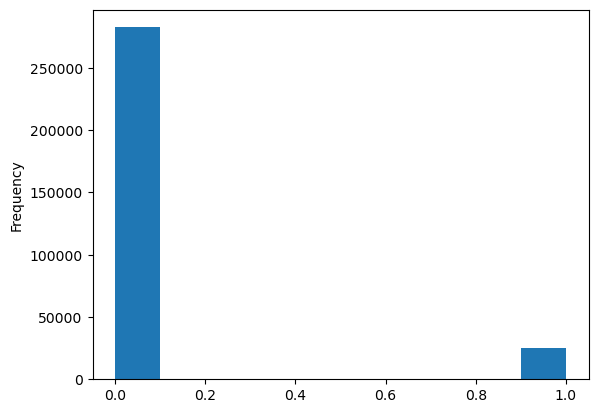

In [40]:
# Exibe a contagem de valores únicos na coluna 'TARGET' do DataFrame 'application_train'.
# A função 'value_counts()' conta o número de ocorrências de cada valor (0 e 1).
# Isso é útil para verificar o balanceamento das classes na variável-alvo.
# 0 indica que o cliente pagou o empréstimo em dia, enquanto 1 indica inadimplência.
print(data['application_train']['TARGET'].value_counts())

# Converte a coluna 'TARGET' para o tipo inteiro e plota um histograma da distribuição.
# O histograma mostra graficamente a frequência de cada classe (0 e 1).
# Isso facilita a visualização do desbalanceamento entre as classes, o que é comum em problemas de crédito.
data['application_train']['TARGET'].astype(int).plot.hist();

In [41]:
# Inicializa o SMOTE (Synthetic Minority Over-sampling Technique) com um 'random_state' para reprodutibilidade.
# O SMOTE é uma técnica de oversampling que cria novas amostras sintéticas da classe minoritária (neste caso, '1' - inadimplência)
# para balancear as classes, ajudando a melhorar o desempenho de modelos que são sensíveis ao desbalanceamento.
smote = SMOTE(random_state=42)

# Aplica o SMOTE aos dados de treinamento padronizados.
# 'fit_resample' ajusta o SMOTE aos dados e cria novas amostras para a classe minoritária.
# O resultado é um novo conjunto de treinamento ('X_train_resampled', 'y_train_resampled') onde as classes estão balanceadas.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_split)

# Imprime a distribuição das classes após a aplicação do SMOTE.
# 'Counter' conta as ocorrências de cada classe (0 e 1) em 'y_train_resampled', mostrando que as classes estão agora balanceadas.
print("Depois do SMOTE:", Counter(y_train_resampled))

Depois do SMOTE: Counter({0: 226145, 1: 226145})


In [42]:
# Treina e avalia cada um dos modelos definidos utilizando os dados balanceados após aplicação do SMOTE.
# O balanceamento com SMOTE ajuda os modelos a aprenderem melhor os padrões da classe minoritária (inadimplência).

for model_name, model in models.items():
    # Ajusta (treina) o modelo usando os dados de treinamento balanceados 'X_train_resampled' e 'y_train_resampled'.
    model.fit(X_train_resampled, y_train_resampled)
    
    # Realiza previsões sobre o conjunto de validação padronizado 'X_valid_scaled'.
    # Usa 'predict_proba' para obter as probabilidades de cada classe (0 e 1).
    # O índice [:, 1] seleciona as probabilidades da classe 1 (inadimplência).
    y_pred_valid = model.predict_proba(X_valid_scaled)[:, 1]
    
    # Calcula a métrica ROC AUC usando as probabilidades previstas e os rótulos verdadeiros 'y_valid'.
    # A ROC AUC mede a habilidade do modelo em distinguir entre as classes, variando de 0 a 1.
    # Um valor mais próximo de 1 indica que o modelo é melhor em classificar as duas classes corretamente.
    roc_auc = roc_auc_score(y_valid, y_pred_valid)
    
    # Exibe o nome do modelo e o valor da métrica ROC AUC, arredondado para quatro casas decimais.
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")

Logistic Regression ROC AUC: 0.7414
Random Forest ROC AUC: 0.7023


/home/srm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost ROC AUC: 0.7469


In [43]:
# Define a forma das entradas, que é igual ao número de colunas em 'X_train_resampled' (número de features).
# A forma das entradas é necessária para criar o modelo de Rede Neural Densa (DNN).
input_shape = X_train_resampled.shape[1]

# Inicializa o modelo DNN otimizado chamando a função 'create_optimized_dnn_model' com a forma das entradas.
optimized_dnn_model = create_optimized_dnn_model(input_shape)

# Define o callback de 'Early Stopping' para interromper o treinamento se a AUC de validação não melhorar após 3 épocas consecutivas.
# O Early Stopping ajuda a evitar overfitting parando o treinamento quando o modelo não apresenta melhorias.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',       # Monitora a métrica AUC de validação.
    patience=3,              # Aumenta a paciência para parar após 3 épocas sem melhoria.
    mode='max',              # Queremos maximizar a AUC.
    restore_best_weights=True  # Restaura os pesos do modelo a partir da época com a melhor AUC.
)

# Treina o modelo DNN otimizado utilizando os dados de treinamento balanceados e os dados de validação.
# A padronização dos dados e o balanceamento com SMOTE são aplicados para melhorar o desempenho do modelo.
history = optimized_dnn_model.fit(
    X_train_resampled, y_train_resampled,
    epochs=10,                 # Número máximo de épocas para treinamento.
    batch_size=264,            # Tamanho do lote (quantidade de exemplos processados antes de atualizar os pesos do modelo).
    validation_data=(X_valid_scaled, y_valid),  # Usa o conjunto de validação padronizado para avaliar o modelo durante o treinamento.
    callbacks=[early_stopping], # Adiciona o callback de 'early stopping' para parar o treinamento antecipadamente.
    verbose=1                  # Define a verbosidade para mostrar o progresso do treinamento.
)

# Avalia o modelo DNN otimizado nos dados de validação.
# Usa 'predict' para gerar as previsões do modelo e 'ravel()' para achatar o array em um vetor 1D para calcular a AUC.
y_pred_valid_dnn = optimized_dnn_model.predict(X_valid_scaled).ravel()

# Calcula a métrica ROC AUC com as previsões e os rótulos reais de validação.
roc_auc_dnn = roc_auc_score(y_valid, y_pred_valid_dnn)

# Imprime a AUC do modelo DNN otimizado, arredondada para quatro casas decimais.
print(f"Deep Neural Network ROC AUC otimizada: {roc_auc_dnn:.4f}")

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.7792 - loss: 0.5642 - val_AUC: 0.7262 - val_loss: 0.4818
Epoch 2/10
  34/1714 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8387 - loss: 0.4989  

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8405 - loss: 0.4945 - val_AUC: 0.7217 - val_loss: 0.4976
Epoch 3/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8591 - loss: 0.4686 - val_AUC: 0.7209 - val_loss: 0.4407
Epoch 4/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8721 - loss: 0.4483 - val_AUC: 0.7151 - val_loss: 0.4386
Epoch 5/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8798 - loss: 0.4357 - val_AUC: 0.7110 - val_loss: 0.4309
Epoch 6/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8867 - loss: 0.4243 - val_AUC: 0.7106 - val_loss: 0.4112
Epoch 7/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8910 - loss: 0.4165 - val_AUC: 0.7180 - val_loss: 0.3732
Epoch 8/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8950 - loss: 0.4096 - val_AUC: 0.7034 - val_loss: 0.4565
Epoch 9/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8978 - loss: 0.4042 - val_AUC: 0.7151 - val_loss: 0.3912
Epoch 10/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/s

In [44]:
# Verifica se a variável 'X_train_resampled' está definida antes de tentar deletá-la.
if 'X_train_resampled' in globals():
    del X_train_resampled
    gc.collect()

# Verifica se a variável 'y_train_resampled' está definida antes de tentar deletá-la.
if 'y_train_resampled' in globals():
    del y_train_resampled
    gc.collect()

In [45]:
# Separa a variável-alvo 'TARGET' do DataFrame 'application_train' e a armazena em 'y_train'.
# 'TARGET' contém os rótulos para a classificação, indicando se um cliente ficou inadimplente (1) ou não (0).
y_train = data['application_train']['TARGET']

# Cria o conjunto de features (variáveis preditoras) 'X_train' removendo apenas a coluna 'TARGET' do DataFrame de treino.
# Mantém todas as demais variáveis que serão utilizadas para prever o status de inadimplência dos clientes.
X_train = data['application_train'].drop(columns=['TARGET'])  # Remove apenas a variável-alvo, mantendo as outras variáveis.

# Cria o conjunto de features 'X_test' a partir do DataFrame 'application_test'.
# Os dados de teste não possuem a coluna 'TARGET' e são usados para fazer previsões.
X_test = data['application_test']  # Usa todas as variáveis disponíveis no conjunto de teste para prever o risco de crédito.

In [46]:
# Agrega os dados de 'bureau' agrupando por 'SK_ID_CURR' (identificador de cada cliente).
# Aplica as funções de agregação 'mean', 'sum', 'max', 'min' a todas as colunas numéricas.
# Cada cliente terá uma linha com a média, soma, máximo e mínimo de seus registros de crédito no 'bureau'.
bureau_agg = data['bureau'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])

# Renomeia as colunas resultantes para criar nomes únicos, unindo os nomes das colunas originais e as operações de agregação.
# Isso garante que cada coluna tenha um nome distinto e fácil de identificar.
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]

# Agrega os dados de 'previous_application' agrupando por 'SK_ID_CURR'.
# Aplica 'mean', 'sum', 'max', 'min' a todas as colunas, resumindo os pedidos anteriores de empréstimo por cliente.
previous_app_agg = data['previous_application'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])

# Renomeia as colunas para criar nomes únicos, unindo o nome original da coluna com a operação de agregação.
previous_app_agg.columns = ['_'.join(col).strip() for col in previous_app_agg.columns.values]

# Agrega os dados de 'credit_card_balance' agrupando por 'SK_ID_CURR'.
# Aplica as operações de agregação a todas as colunas, resumindo os saldos de cartões de crédito dos clientes.
credit_card_agg = data['credit_card_balance'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])

# Renomeia as colunas de 'credit_card_balance' para criar nomes únicos.
credit_card_agg.columns = ['_'.join(col).strip() for col in credit_card_agg.columns.values]

# Agrega os dados de 'POS_CASH_balance' agrupando por 'SK_ID_CURR'.
# Aplica 'mean', 'sum', 'max', 'min' para sumarizar os registros de saldos de pontos de venda e empréstimos em dinheiro.
pos_cash_agg = data['POS_CASH_balance'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])

# Renomeia as colunas de 'POS_CASH_balance' para nomes únicos.
pos_cash_agg.columns = ['_'.join(col).strip() for col in pos_cash_agg.columns.values]

# Agrega os dados de 'installments_payments' agrupando por 'SK_ID_CURR'.
# Aplica as funções de agregação para sumarizar os pagamentos de parcelas anteriores de cada cliente.
installments_agg = data['installments_payments'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])

# Renomeia as colunas resultantes para criar nomes únicos e diferenciá-las, adicionando o prefixo 'installments_'.
installments_agg.columns = ['installments_' + '_'.join(col).strip() for col in installments_agg.columns.values]

In [47]:
# Imputa (preenche) valores ausentes em cada um dos DataFrames 'application_train' e 'application_test'.
# A função 'impute_cols_with_nas' trata os valores ausentes em colunas numéricas e categóricas.

# Aplica a função 'impute_cols_with_nas' ao DataFrame 'application_train' para preencher valores ausentes.
# Isso garante que as colunas numéricas sejam preenchidas com a mediana e as colunas categóricas com a moda.
impute_cols_with_nas(application_train)

# Aplica a função 'impute_cols_with_nas' ao DataFrame 'application_test' para preencher valores ausentes.
# Isso assegura que ambas as tabelas (treino e teste) estejam consistentes em termos de preenchimento de dados ausentes.
impute_cols_with_nas(application_test)

In [48]:
# Remove a coluna 'SK_ID_CURR' dos DataFrames 'application_train' e 'application_test'.
# 'SK_ID_CURR' é um identificador único para cada cliente e não é útil como uma feature para a modelagem preditiva.
# O identificador é removido para que o modelo de machine learning foque nas variáveis relevantes para a previsão de inadimplência.

# Cria um novo DataFrame 'application_train_data' contendo todas as colunas de 'application_train', exceto 'SK_ID_CURR'.
# Isso mantém apenas as features que serão usadas no treinamento do modelo.
application_train_data = application_train.drop(columns=['SK_ID_CURR'])

# Cria um novo DataFrame 'application_test_data' contendo todas as colunas de 'application_test', exceto 'SK_ID_CURR'.
# Isso assegura que o conjunto de teste esteja no mesmo formato do conjunto de treinamento, sem a coluna identificadora.
application_test_data = application_test.drop(columns=['SK_ID_CURR'])

In [49]:
# Exclui o DataFrame 'application_train' da memória para liberar espaço.
# Após criar 'application_train_data' com as colunas relevantes para a modelagem,
# o DataFrame original 'application_train' não é mais necessário.
# Isso ajuda a economizar memória, especialmente quando se trabalha com grandes conjuntos de dados.
del application_train

# Chama o coletor de lixo (garbage collector) para liberar a memória que estava sendo usada pelo 'application_train'.
# O coletor de lixo é responsável por liberar automaticamente a memória que não está mais em uso.
# Chamar 'gc.collect()' força a execução do coletor, liberando memória imediatamente.
gc.collect()

0

In [50]:
# Alinha 'application_train_data' e 'y_train' para garantir que ambos tenham os mesmos índices.
# Isso é necessário para corrigir a diferença no número de linhas entre os dois DataFrames,
# que causou o erro durante a divisão com 'train_test_split'.
# 'join="inner"' faz com que apenas as linhas com índices comuns em ambos os DataFrames sejam mantidas.
application_train_data, y_train = application_train_data.align(y_train, join='inner', axis=0)

# Divide os dados de treinamento em dois conjuntos: 'X_train_split' e 'X_valid' para as features (variáveis preditoras),
# e 'y_train_split' e 'y_valid' para os rótulos (TARGET).
# Isso é feito para criar um conjunto de validação que pode ser usado para avaliar o desempenho do modelo durante o treinamento.
# 'application_train_data' contém as features que serão usadas para treinar o modelo, enquanto 'y_train' é a variável-alvo.
# 'test_size=0.2' indica que 20% dos dados serão usados para validação, e 80% para o treinamento.
# 'random_state=42' garante que a divisão dos dados seja reprodutível, produzindo os mesmos resultados em execuções diferentes.
# 'stratify=y_train' garante que a proporção das classes (0 e 1) no conjunto de treinamento e no conjunto de validação seja mantida,
# o que é importante quando há um desbalanceamento entre as classes.
X_train_split, X_valid, y_train_split, y_valid = train_test_split(
    application_train_data, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [51]:
# Converte variáveis categóricas em variáveis numéricas usando 'pd.get_dummies'.
# Isso cria colunas binárias para cada categoria em variáveis categóricas.
# Cada valor único em uma variável categórica se torna uma coluna separada,
# com valores 0 ou 1 indicando a presença ou ausência dessa categoria.
X_train_split = pd.get_dummies(X_train_split)
X_valid = pd.get_dummies(X_valid)

# Alinha as colunas de 'X_train_split' e 'X_valid' para garantir que ambas tenham as mesmas colunas.
# Isso é necessário porque 'get_dummies' pode criar um número diferente de colunas para cada DataFrame,
# dependendo das categorias presentes nos dados de treino e de validação.
# 'join="left"' mantém todas as colunas de 'X_train_split' e adiciona colunas em 'X_valid' conforme necessário,
# preenchendo valores ausentes com 0 para garantir compatibilidade.
X_train_split, X_valid = X_train_split.align(X_valid, join='left', axis=1, fill_value=0)

# Inicializa o objeto 'StandardScaler' para padronizar os dados.
# A padronização transforma as features para que tenham média 0 e desvio padrão 1.
# Isso é importante para modelos que são sensíveis à escala dos dados, como redes neurais e métodos de regularização.
scaler = StandardScaler()

# Ajusta o 'scaler' nos dados de treinamento usando 'fit_transform' e transforma os dados de treinamento.
# O 'fit_transform' calcula a média e o desvio padrão de cada feature em 'X_train_split' e, em seguida, aplica a transformação.
# O resultado é um conjunto de treinamento 'X_train_scaled' onde cada feature está padronizada.
X_train_scaled = scaler.fit_transform(X_train_split)

# Transforma os dados de validação usando os mesmos parâmetros (média e desvio padrão) calculados a partir dos dados de treinamento.
# Isso garante que a padronização dos dados de validação esteja de acordo com os mesmos padrões dos dados de treinamento.
# O 'transform' aplica a transformação, mas sem recalcular os parâmetros.
X_valid_scaled = scaler.transform(X_valid)

In [52]:
# Treina e avalia cada um dos modelos definidos utilizando os dados padronizados.
# A padronização dos dados (X_train_scaled e X_valid_scaled) garante que todas as variáveis estejam na mesma escala,
# o que pode melhorar o desempenho de certos modelos de machine learning, especialmente aqueles que utilizam otimização numérica.

for model_name, model in models.items():
    # Ajusta (treina) o modelo usando os dados de treinamento padronizados 'X_train_scaled' e os rótulos 'y_train_split'.
    model.fit(X_train_scaled, y_train_split)
    
    # Realiza previsões sobre o conjunto de validação padronizado 'X_valid_scaled'.
    # Usa 'predict_proba' para obter as probabilidades de cada classe (0 e 1).
    # O índice [:, 1] seleciona as probabilidades da classe 1 (inadimplência).
    y_pred_valid = model.predict_proba(X_valid_scaled)[:, 1]
    
    # Calcula a métrica ROC AUC usando as probabilidades previstas e os rótulos verdadeiros 'y_valid'.
    # A ROC AUC mede a habilidade do modelo em distinguir entre as classes, variando de 0 a 1.
    # Um valor mais próximo de 1 indica que o modelo é melhor em classificar as duas classes corretamente.
    roc_auc = roc_auc_score(y_valid, y_pred_valid)
    
    # Exibe o nome do modelo e o valor da métrica ROC AUC, arredondado para quatro casas decimais.
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")

Logistic Regression ROC AUC: 1.0000
Random Forest ROC AUC: 1.0000


/home/srm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:38:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost ROC AUC: 1.0000


In [53]:
# Define a forma das entradas, que é igual ao número de colunas em 'X_train_scaled' (número de features).
# A forma das entradas é necessária para criar o modelo de Rede Neural Densa (DNN).
input_shape = X_train_scaled.shape[1]

# Inicializa o modelo DNN otimizado chamando a função 'create_optimized_dnn_model' com a forma das entradas.
# Esse modelo possui camadas adicionais e técnicas de regularização para melhorar a performance.
optimized_dnn_model = create_optimized_dnn_model(input_shape)

# Define o callback de 'Early Stopping' para interromper o treinamento se a AUC de validação não melhorar.
# O 'restore_best_weights=True' faz com que o modelo restaure os pesos da melhor época, evitando overfitting.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',       # Monitora a métrica AUC de validação.
    mode='max',              # Queremos maximizar a AUC.
    restore_best_weights=True  # Restaura os pesos do modelo a partir da época com a melhor AUC.
)

# Treina o modelo DNN otimizado utilizando os dados de treinamento padronizados e os dados de validação.
# A padronização dos dados garante que todas as variáveis estejam na mesma escala, melhorando a eficiência do treinamento.
history = optimized_dnn_model.fit(
    X_train_scaled, y_train_split,  # Conjunto de treinamento e seus rótulos.
    epochs=10,                     # Número máximo de épocas para treinamento.
    batch_size=512,                # Tamanho do lote (quantidade de exemplos processados antes de atualizar os pesos do modelo).
    validation_data=(X_valid_scaled, y_valid),  # Usa o conjunto de validação padronizado para avaliar o modelo durante o treinamento.
    callbacks=[early_stopping],    # Adiciona o callback de 'early stopping' para parar o treinamento antecipadamente.
    verbose=1                      # Define a verbosidade para mostrar o progresso do treinamento.
)

# Avalia o modelo DNN otimizado nos dados de validação.
# Usa 'predict' para gerar as previsões do modelo e 'ravel()' para achatar o array em um vetor 1D para calcular a AUC.
y_pred_valid_dnn = optimized_dnn_model.predict(X_valid_scaled).ravel()

# Calcula a métrica ROC AUC com as previsões e os rótulos reais de validação.
roc_auc_dnn = roc_auc_score(y_valid, y_pred_valid_dnn)

# Imprime a AUC do modelo DNN otimizado, arredondada para quatro casas decimais.
print(f"Optimized Deep Neural Network ROC AUC: {roc_auc_dnn:.4f}")

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9726 - loss: 0.0645 - val_AUC: 0.9993 - val_loss: 0.0015
Epoch 2/10
 23/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 1.0000 - loss: 0.0020     

/home/srm/anaconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.9999 - loss: 0.0018 - val_AUC: 0.9997 - val_loss: 0.0011
Epoch 3/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9997 - loss: 0.0017 - val_AUC: 1.0000 - val_loss: 5.1487e-04
Epoch 4/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9998 - loss: 0.0012 - val_AUC: 1.0000 - val_loss: 6.2545e-04
Epoch 5/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9999 - loss: 9.4594e-04 - val_AUC: 1.0000 - val_loss: 4.5898e-04
Epoch 6/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9999 - loss: 6.0565e-04 - val_AUC: 0.9997 - val_loss: 6.5944e-04
Epoch 7/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.9999 - loss: 6.3437e-04 - val_AUC: 1.0000 - val_loss: 3.6733e-04
Epoch 8/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.9999 - loss: 5.5294e-04 - val_AUC: 0.9998 - val_loss: 6.3711e-04
Epoch 9/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9999 - loss: 8.4338e-04 - val_AUC: 0.9997 - val_loss: 5.1899e-04
Epoch 10/10
481/481

In [54]:
# Converte variáveis categóricas em variáveis numéricas usando 'pd.get_dummies'.
# Isso cria colunas binárias para cada categoria em variáveis categóricas.
# Cada valor único em uma variável categórica se torna uma coluna separada,
# com valores 0 ou 1 indicando a presença ou ausência dessa categoria.
application_train_data = pd.get_dummies(application_train_data)
application_test_data = pd.get_dummies(application_test_data)

# Alinha as colunas de 'application_train_data' e 'application_test_data' para garantir que ambas tenham as mesmas colunas.
# Isso é necessário porque 'get_dummies' pode criar um número diferente de colunas para cada DataFrame,
# dependendo das categorias presentes nos dados de treino e de teste.
# 'join="left"' mantém todas as colunas de 'application_train_data' e adiciona colunas em 'application_test_data' conforme necessário,
# preenchendo valores ausentes com 0 para garantir compatibilidade.
application_train_data, application_test_data = application_train_data.align(application_test_data, join='left', axis=1, fill_value=0)

# Inicializa o objeto 'StandardScaler' para padronizar os dados.
# A padronização transforma as features para que tenham média 0 e desvio padrão 1.
# Isso é importante para modelos que são sensíveis à escala dos dados, como redes neurais e métodos de regularização.
scaler = StandardScaler()

# Ajusta o 'scaler' nos dados de treinamento usando 'fit_transform' e transforma os dados de treinamento.
# O 'fit_transform' calcula a média e o desvio padrão de cada feature em 'application_train_data' e, em seguida, aplica a transformação.
# O resultado é um conjunto de treinamento 'X_train_scaled' onde cada feature está padronizada.
X_train_scaled = scaler.fit_transform(application_train_data)

# Transforma os dados de teste usando os mesmos parâmetros (média e desvio padrão) calculados a partir dos dados de treinamento.
# Isso garante que a padronização dos dados de teste esteja de acordo com os mesmos padrões dos dados de treinamento.
# O 'transform' aplica a transformação, mas sem recalcular os parâmetros.
X_test_scaled = scaler.transform(application_test_data)

In [55]:
# Exibe a forma (shape) do array 'X_train_scaled'.
# O shape indica o número de amostras (linhas) e o número de features (colunas) após a transformação dos dados de treinamento.
# Esse comando ajuda a verificar se o número de variáveis e amostras está conforme o esperado antes de seguir para o treinamento do modelo.
X_train_scaled.shape

(307507, 244)

In [56]:
# Exibe a forma (shape) do array 'X_test_scaled'.
# O shape indica o número de amostras (linhas) e o número de features (colunas) após a transformação dos dados de teste.
# Esse comando ajuda a verificar se o número de variáveis no conjunto de teste é compatível com o conjunto de treinamento.
X_test_scaled.shape

(48744, 244)

In [57]:
# Exibe o número de amostras (linhas) no vetor 'y_train'.
# 'y_train' contém os rótulos da variável-alvo (TARGET) para o conjunto de treinamento.
# Esse comando ajuda a verificar se o número de rótulos corresponde ao número de amostras no conjunto de treinamento.
len(y_train)

307507

In [58]:
# Treina e avalia cada um dos modelos definidos utilizando os dados padronizados.
# A padronização dos dados (X_train_scaled e X_test_scaled) garante que todas as variáveis estejam na mesma escala,
# o que pode melhorar o desempenho de certos modelos de machine learning, especialmente aqueles que utilizam otimização numérica.

for model_name, model in models.items():
    # Ajusta (treina) o modelo usando os dados de treinamento padronizados 'X_train_scaled' e os rótulos 'y_train'.
    model.fit(X_train_scaled, y_train)
    
    # Realiza previsões sobre o conjunto de teste padronizado 'X_test_scaled'.
    # Usa 'predict_proba' para obter as probabilidades de cada classe (0 e 1).
    # O índice [:, 1] seleciona as probabilidades da classe 1 (inadimplência).
    y_test_pred = model.predict_proba(X_test_scaled)[:, 1]
    
    # Cria um DataFrame para a submissão com os identificadores dos clientes ('SK_ID_CURR') e as probabilidades de inadimplência ('TARGET').
    submission = pd.DataFrame({'SK_ID_CURR': application_test['SK_ID_CURR'], 'TARGET': y_test_pred})
    
    # Define o nome do arquivo de submissão baseado no nome do modelo.
    # Substitui espaços por underscores e converte o nome para minúsculas para um nome de arquivo consistente.
    submission_filename = f'submission_{model_name.replace(" ", "_").lower()}.csv'
    
    # Salva o DataFrame de submissão em um arquivo CSV.
    # O arquivo CSV pode ser usado para envio em competições de machine learning ou para análise posterior.
    submission.to_csv(submission_filename, index=False)
    
    # Exibe uma mensagem indicando que o arquivo de submissão foi criado.
    print("Submission file created!")

Submission file created!
Submission file created!


/home/srm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Submission file created!


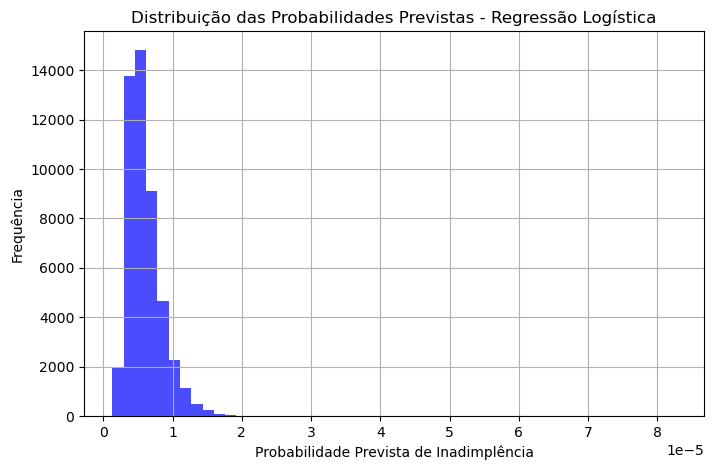

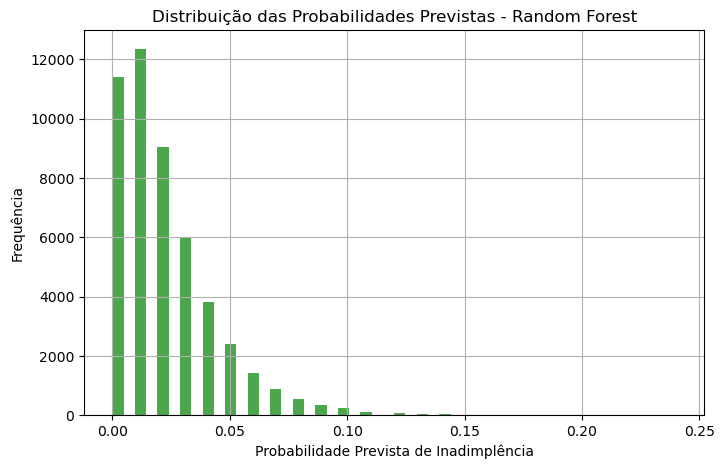

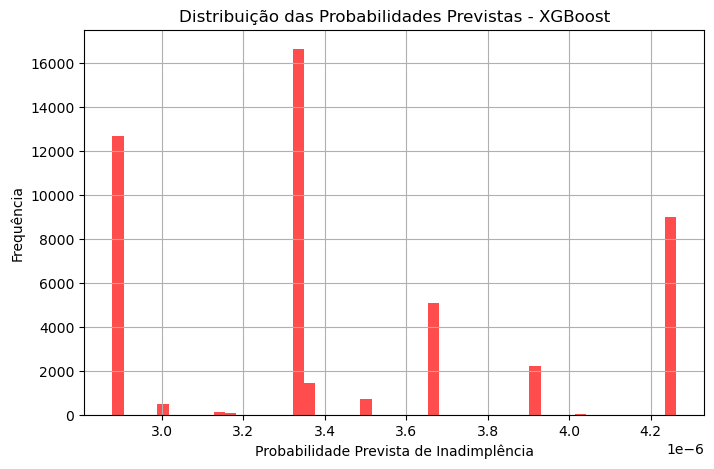

In [124]:
# Carregar os arquivos CSV com as previsões de cada modelo
logistic_regression_results = pd.read_csv('submission_logistic_regression.csv')
random_forest_results = pd.read_csv('submission_random_forest.csv')
xgboost_results = pd.read_csv('submission_xgboost.csv')

# Criar uma figura para o histograma da Regressão Logística
plt.figure(figsize=(8, 5))
plt.hist(logistic_regression_results['TARGET'], bins=50, alpha=0.7, color='blue')
plt.title('Distribuição das Probabilidades Previstas - Regressão Logística')
plt.xlabel('Probabilidade Prevista de Inadimplência')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar uma figura para o histograma da Random Forest
plt.figure(figsize=(8, 5))
plt.hist(random_forest_results['TARGET'], bins=50, alpha=0.7, color='green')
plt.title('Distribuição das Probabilidades Previstas - Random Forest')
plt.xlabel('Probabilidade Prevista de Inadimplência')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar uma figura para o histograma do XGBoost
plt.figure(figsize=(8, 5))
plt.hist(xgboost_results['TARGET'], bins=50, alpha=0.7, color='red')
plt.title('Distribuição das Probabilidades Previstas - XGBoost')
plt.xlabel('Probabilidade Prevista de Inadimplência')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()